In [91]:
#Adding new items

def apply_percentage(numbers, percentages):
    """
    Computes the percentage of each number in the list.

    :param numbers: List of integers.
    :param percentages: List of percentages corresponding to each number.
                        For example, if percentages[i] is 66, it represents 66%.
    :return: A list where each element is (percentage/100 * corresponding number).
    """
    if len(numbers) != len(percentages):
        raise ValueError("The lists 'numbers' and 'percentages' must have the same length.")

    return [(p / 100.0) * num for num, p in zip(numbers, percentages)]

# Example usage:
numbers = [100, 200, 300]
percentages = [50, 75, 66]  # Representing 50%, 75%, 66%
result = apply_percentage(numbers, percentages)
print(result)  # Output: [50.0, 150.0, 198.0]

def barPlot_3(heuristic_cut, neural_cut1, neural_cut2, labels, nn_std_percent, nn_std_percent_ran, title = 'Comparison of 3-way Maximum Cut Values by Algorithm', y_lim = None,
              nn_std_percent_GCN = [], nn_std_percent_cplex = []):
    """
    Plots three bars (Integer Solver, Randomizer, Neural Network) side by side
    for each item on the x-axis. Only the Neural Network bars will have error bars
    based on a standard deviation expressed in percentage.

    :param heuristic_cut: List of values for "Integer Solver"
    :param neural_cut1:   List of values for "Randomizer"
    :param neural_cut2:   List of values for "Neural Network" (the bars that get error bars)
    :param labels:        List of x-axis labels
    :param nn_std_percent:
        List of standard deviations in PERCENTAGE (same length as the other lists).
        For example, if nn_std_percent[i] == 5.0, that means 5% of neural_cut2[i].
    """

    if not (len(heuristic_cut) == len(neural_cut1) == len(neural_cut2) == len(labels) == len(nn_std_percent) == len(nn_std_percent_ran) ):
        raise ValueError("All input lists must have the same length (including nn_std_percent).")

    # Number of groups
    n_groups = len(heuristic_cut)
    index = np.arange(n_groups)
    bar_width = 0.25  # Adjusted width for three bars per group

    plt.figure(figsize=(14, 6))

    # Bar 1: Integer Solver
    bar1 = plt.bar(
        index,
        heuristic_cut,
        bar_width,
        label='Integer Solver',
        color='skyblue'
    )

    # Bar 2: Randomizer
    # bar2 = plt.bar(
    #     index + bar_width,
    #     neural_cut1,
    #     bar_width,
    #     label='Randmizer',
    #     color='orange'
    # )
    nn_std_abs_ran = [
        (nn_std_percent_ran[i] / 100.0) * neural_cut1[i]
        for i in range(n_groups)
    ]
    bar3 = plt.bar(
        index + 1 * bar_width,
        neural_cut1,
        bar_width,
        label='Randmized Algorithm',
        color='orange',
        yerr=nn_std_abs_ran,   # <--- Attach error bars here
        capsize=5,
        ecolor='black'
    )
    # -------------------------------
    # Convert percentage std dev to absolute std dev for the NN bars
    # If nn_std_percent[i] = 5.0, that means "5% of neural_cut2[i]"
    nn_std_abs = [
        (nn_std_percent[i] / 100.0) * neural_cut2[i]
        for i in range(n_groups)
    ]
    # -------------------------------

    # Bar 3: Neural Network (with error bars)
    bar3 = plt.bar(
        index + 2 * bar_width,
        neural_cut2,
        bar_width,
        label='Neural Network',
        color='green',
        yerr=nn_std_abs,   # <--- Attach error bars here
        capsize=5,
        ecolor='black'
    )



    # Add labels, title, legend
    plt.xlabel('Graphs (nodes)')
    plt.ylabel('Maximum Cut Value')
    plt.title(title)
    plt.xticks(index + bar_width, labels)
    plt.legend()

    if (y_lim != None):
        plt.ylim(top=y_lim)

    # Optionally, annotate the "Randomizer" & "Neural Network" bars with percentages
    for i in range(n_groups):
        cuts = [neural_cut1[i], neural_cut2[i]]
        for j, cut in enumerate(cuts):
            # Calculate the percentage relative to the Heuristic bar
            percentage = (cut / heuristic_cut[i]) * 100 if heuristic_cut[i] != 0 else 0

            # Position
            x_pos = index[i] + (j + 1) * bar_width
            y_pos = cut

            # Choose text color based on bar height for readability
            text_color = 'white' if y_pos > max(cuts) * 0.1 else 'black'

            plt.text(
                x_pos, y_pos / 2,
                f'{percentage:.0f}%',
                ha='center', va='center',
                color=text_color,
                fontsize=10, fontweight='bold'
            )

    plt.tight_layout()
    plt.show()



def barPlot_3_speedup(
        heuristic_cut, neural_cut1, neural_cut2, labels, nn_std_percent,
        nn_std_percent_ran, title='Comparison of 3-way Maximum Cut Values by Algorithm',
        y_lim=None
):
    """
    Plots three bars (Integer Solver, Randomizer, Neural Network) side by side
    for each item on the x-axis. Only the Neural Network bars will have error bars
    based on a standard deviation expressed in percentage.

    :param heuristic_cut:  List of values for "CPLEX"
    :param neural_cut1:    List of values for "Randomizer"
    :param neural_cut2:    List of values for "Neural Network"
    :param labels:         List of x-axis labels
    :param nn_std_percent: List of std devs in PERCENTAGE for neural_cut2
    :param nn_std_percent_ran: List of std devs in PERCENTAGE for neural_cut1
    :param title:          Plot title
    :param y_lim:          Optional Y-axis upper limit
    """
    # Basic input validation
    if not (
            len(heuristic_cut) == len(neural_cut1) == len(neural_cut2) ==
            len(labels) == len(nn_std_percent) == len(nn_std_percent_ran)
    ):
        raise ValueError("All input lists must have the same length.")

    n_groups = len(heuristic_cut)
    index = np.arange(n_groups)
    bar_width = 0.25

    plt.figure(figsize=(14, 6))

    # Bar 1: CPLEX (Heuristic)
    bar1 = plt.bar(
        index,
        heuristic_cut,
        bar_width,
        label='CPLEX',
        color='skyblue'
    )

    # Convert percentage std dev for Randomizer to absolute error
    nn_std_abs_ran = [
        (nn_std_percent_ran[i] / 100.0) * neural_cut1[i]
        for i in range(n_groups)
    ]
    # Bar 2: Randomizer
    bar2 = plt.bar(
        index + 1 * bar_width,
        neural_cut1,
        bar_width,
        label='Randomized Algorithm',
        color='orange',
        yerr=nn_std_abs_ran,
        capsize=5,
        ecolor='black'
    )

    # Convert percentage std dev for Neural Network to absolute error
    nn_std_abs = [
        (nn_std_percent[i] / 100.0) * neural_cut2[i]
        for i in range(n_groups)
    ]
    # Bar 3: Neural Network (with error bars)
    bar3 = plt.bar(
        index + 2 * bar_width,
        neural_cut2,
        bar_width,
        label='Neural Network',
        color='green',
        yerr=nn_std_abs,
        capsize=5,
        ecolor='black'
    )

    # Labeling, legend, etc.
    plt.xlabel('Graphs (nodes)')
    plt.ylabel('Maximum Cut Value')
    plt.title(title)
    plt.xticks(index + bar_width, labels)
    plt.legend()

    if y_lim is not None:
        plt.ylim(top=y_lim)

    # Annotate the Randomizer & Neural Network bars with values on top
    for i in range(n_groups):
        cuts = [neural_cut1[i], neural_cut2[i]]
        for j, cut in enumerate(cuts):
            # Position the text above the bar
            x_pos = index[i] + (j + 1) * bar_width
            y_pos = cut

            # Small offset so text doesn't sit exactly on top of the bar
            offset = 0.02 * cut  # 2% of the bar's height, adjust as needed
            text_y = y_pos + offset+1

            # Choose text color based on bar height for readability
            # (Optional logic)
            text_color = 'black' #if cut > 0.3 * max(cuts) else 'black'

            # Place the text
            plt.text(
                x_pos,
                text_y,
                f'{cut:.0f}s',
                ha='center',
                va='bottom',     # Anchor the text from its bottom
                color=text_color,
                fontsize=10,
                fontweight='bold'
            )

    plt.tight_layout()
    plt.show()

def barPlot_2_speedUp(heuristic_cut, neural_cut, labels, std_percent,  title = 'Balanced 3-way max-cut', y_lim=None):
    # Input validation
    if not (len(heuristic_cut) == len(neural_cut) == len(labels)):
        raise ValueError("All input lists must have the same length.")

    # Number of groups
    n_groups = len(heuristic_cut)
    index = np.arange(n_groups)
    bar_width = 0.35

    # Create the plot
    plt.figure(figsize=(12, 6))  # Adjusted the figure size for better visibility

    # Plot the bars
    bar1 = plt.bar(index, heuristic_cut, bar_width, label='Cplex', color='skyblue')
    bar2 = plt.bar(index + bar_width, neural_cut, bar_width, label='GCN', color='orange')

    # Add labels, title, and legend
    # Add labels, title, and legend
    plt.xlabel('Graph size (nodes)')
    plt.ylabel('Time (s)')
    plt.title(title)
    plt.xticks(index + bar_width / 2, labels)
    plt.legend()

    nn_std_abs = [
        (std_percent[i] / 100.0) * neural_cut[i]
        for i in range(n_groups)
    ]

    bar3 = plt.bar(
        index + 1 * bar_width,
        neural_cut,
        bar_width,
        label='Neural Network',
        color='orange',
        yerr=nn_std_abs,   # <--- Attach error bars here
        capsize=5,
        ecolor='black'
    )

    if y_lim is not None:
        plt.ylim(top=y_lim)
    # Calculate percentages and add them inside the 'Neural Network' bars
    for i in range(n_groups):
        # Calculate the percentage
        percentage = (neural_cut[i] / heuristic_cut[i]) * 100 if heuristic_cut[i] != 0 else 0

        # Get the position and height of the 'Neural Network' bar
        x_pos = index[i] + bar_width
        y_pos = neural_cut[i]


        # Position the text above the bar
        y_pos = neural_cut[i]

        # Small offset so text doesn't sit exactly on top of the bar
        offset = 0.02 * neural_cut[i]  # 2% of the bar's height, adjust as needed
        text_y = y_pos + offset+1

        # Choose text color based on bar height for readability
        # (Optional logic)
        text_color = 'black' #if cut > 0.3 * max(cuts) else 'black'

        # Place the percentage text inside the bar
        plt.text(
            x_pos,                      # X position
            text_y,                  # Y position (middle of the bar)
            f'{neural_cut[i]:.0f}s',       # Text to display
            ha='center',                # Horizontal alignment
            va='center',                # Vertical alignment
            color=text_color,           # Text color
            fontsize=10,                # Font size
            fontweight='bold'           # Font weight
        )

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

def barPlot_3_dot(
        heuristic_cut,
        neural_cut1,
        neural_cut2,
        neural_cut2_dots,
        labels,
        nn_std_percent,
        nn_std_percent_ran,
        title='Comparison of 3-way Maximum Cut Values by Algorithm (With Dot Pattern)',
        y_lim=None,
        nn_std_percent_GCN = [],
        nn_std_percent_cplex = []
):
    """
    Plots three bars (Integer Solver, Randomizer, Neural Network) side by side
    for each item on the x-axis. Only the Randomizer and Neural Network bars
    will have error bars based on a standard deviation expressed in percentage.

    Additionally, a "transparent dot-pattern" overlay bar is added on top of
    the third bar (Neural Network) using the separate data list 'neural_cut2_dots'.

    :param heuristic_cut:      List of values for "Integer Solver"
    :param neural_cut1:        List of values for "Randomizer"
    :param neural_cut2:        List of values for "Neural Network" (bars + error bars)
    :param neural_cut2_dots:   List of values for a dot-pattern overlay on the 3rd bar
                               (must be same length as neural_cut2).
    :param labels:             List of x-axis labels
    :param nn_std_percent:     Std dev in PERCENT for neural_cut2
    :param nn_std_percent_ran: Std dev in PERCENT for neural_cut1
    :param title:              Plot title
    :param y_lim:              Optional Y-axis upper limit
    """
    print(len(heuristic_cut), len(neural_cut1), len(neural_cut2), len(neural_cut2_dots), len(labels), len(nn_std_percent), len(nn_std_percent_ran))
    print(nn_std_percent_ran)
    # Basic input check
    if not (
            len(heuristic_cut) == len(neural_cut1) == len(neural_cut2) ==
            len(neural_cut2_dots) == len(labels) ==
            len(nn_std_percent) == len(nn_std_percent_ran)
    ):
        raise ValueError(
            "All input lists (heuristic_cut, neural_cut1, neural_cut2, "
            "neural_cut2_dots, labels, nn_std_percent, nn_std_percent_ran) "
            "must have the same length."
        )

    n_groups = len(heuristic_cut)
    index = np.arange(n_groups)
    bar_width = 0.22

    plt.figure(figsize=(14, 6))

    # -------------------------------
    # Bar 1: Integer Solver
    # -------------------------------
    nn_std_percent_cplex_abs = [
        (nn_std_percent_cplex[i] / 100.0) * neural_cut2[i]
        for i in range(n_groups)
    ]

    bar1 = plt.bar(
        index,
        heuristic_cut,
        bar_width,
        label='CPLEX',
        color='skyblue',
        yerr=nn_std_percent_cplex_abs,
        capsize=5,
        ecolor='black'
    )

    # -------------------------------
    # Bar 2: Randomizer (with error bars)
    # -------------------------------
    # Convert percentage std dev for Randomizer to absolute
    nn_std_abs_ran = [
        (nn_std_percent_ran[i] / 100.0) * neural_cut1[i]
        for i in range(n_groups)
    ]
    bar2 = plt.bar(
        index + bar_width,
        neural_cut1,
        bar_width,
        label='Randomized Algorithm',
        color='orange',
        yerr=nn_std_abs_ran,
        capsize=5,
        ecolor='black'
    )

    # -------------------------------
    # Bar 3: Neural Network (with error bars)
    # -------------------------------
    # Convert percentage std dev for Neural Network to absolute
    nn_std_abs = [
        (nn_std_percent[i] / 100.0) * neural_cut2[i]
        for i in range(n_groups)
    ]
    bar3 = plt.bar(
        index + 3 * bar_width,
        neural_cut2,
        bar_width,
        label='GCN With Post-processing',
        color='green',
        yerr=nn_std_abs,
        capsize=5,
        ecolor='black'
    )

    # -------------------------------
    # Dot-Pattern Overlay on Bar 3
    # -------------------------------
    # This uses 'neural_cut2_dots' for heights, with a hatch pattern for a dotted look
    # facecolor='none' makes the bar transparent, so only the hatch is visible
    # bar3_dots = plt.bar(
    #     index + 2 * bar_width,
    #     neural_cut2_dots,
    #     bar_width,
    #     facecolor='green',   # transparent fill
    #     edgecolor='black',  # or 'green' if you prefer
    #     alpha=0.3,          # how transparent the hatch lines are
    #     hatch='xx',          # 'o' hatch pattern for dotted style
    #     label='Neural Net'
    # )

    nn_std_abs = [
        (nn_std_percent_GCN[i] / 100.0) * neural_cut2[i]
        for i in range(n_groups)
    ]
    bar3 = plt.bar(
        index + 2 * bar_width,
        neural_cut2_dots,
        bar_width,
        label='GCN',
        color='red',
        yerr=nn_std_abs,
        capsize=5,
        ecolor='black'
    )

    # -------------------------------
    # Labeling, legend, etc.
    # -------------------------------
    plt.xlabel('Graph size (nodes)')
    plt.ylabel('Maximum Cut Value')
    plt.title(title)
    plt.xticks(index + bar_width, labels)

    if y_lim is not None:
        plt.ylim(top=y_lim)

    plt.legend()

    # Example: Annotate the Randomizer & Neural Network bars with a relative percentage
    for i in range(n_groups):
        cuts = [neural_cut1[i],  neural_cut2_dots[i], neural_cut2[i]]
        for j, cut in enumerate(cuts):
            # Calculate the percentage relative to the Heuristic bar
            base = heuristic_cut[i] if heuristic_cut[i] else 1
            percentage = (cut / base) * 100

            x_pos = index[i] + (j + 1) * bar_width
            y_pos = cut

            text_color = 'white' if y_pos > max(cuts) * 0.3 else 'black'
            plt.text(
                x_pos, y_pos * 0.5,
                f'{percentage:.0f}%',
                ha='center', va='center',
                color=text_color,
                fontsize=10,
                fontweight='bold'
            )

    plt.tight_layout()
    plt.show()


def barPlot_3_speedup_dot(
        heuristic_cut, neural_cut1, neural_cut2, neural_cut2_dots, labels, nn_std_percent,
        nn_std_percent_ran, title='Comparison of 3-way Maximum Cut Values by Algorithm',
        y_lim=None, nn_std_percent_GCN = []
):
    """
    Plots three bars (Integer Solver, Randomizer, Neural Network) side by side
    for each item on the x-axis. Only the Neural Network bars will have error bars
    based on a standard deviation expressed in percentage.

    :param heuristic_cut:  List of values for "CPLEX"
    :param neural_cut1:    List of values for "Randomizer"
    :param neural_cut2:    List of values for "Neural Network"
    :param labels:         List of x-axis labels
    :param nn_std_percent: List of std devs in PERCENTAGE for neural_cut2
    :param nn_std_percent_ran: List of std devs in PERCENTAGE for neural_cut1
    :param title:          Plot title
    :param y_lim:          Optional Y-axis upper limit
    """
    # Basic input validation
    if not (
            len(heuristic_cut) == len(neural_cut1) == len(neural_cut2) ==
            len(labels) == len(nn_std_percent) == len(nn_std_percent_ran)
    ):
        raise ValueError("All input lists must have the same length.")

    n_groups = len(heuristic_cut)
    index = np.arange(n_groups)
    bar_width = 0.22

    plt.figure(figsize=(14, 6))

    # Bar 1: CPLEX (Heuristic)
    bar1 = plt.bar(
        index,
        heuristic_cut,
        bar_width,
        label='CPLEX',
        color='skyblue'
    )

    # Convert percentage std dev for Randomizer to absolute error
    nn_std_abs_ran = [
        (nn_std_percent_ran[i] / 100.0) * neural_cut1[i]
        for i in range(n_groups)
    ]
    # Bar 2: Randomizer
    bar2 = plt.bar(
        index + 1 * bar_width,
        neural_cut1,
        bar_width,
        label='Randomized Algorithm',
        color='orange',
        yerr=nn_std_abs_ran,
        capsize=5,
        ecolor='black'
    )

    # # Convert percentage std dev for Neural Network to absolute error
    # nn_std_abs = [
    #     (nn_std_percent[i] / 100.0) * neural_cut2[i]
    #     for i in range(n_groups)
    # ]
    # # Bar 3: Neural Network (with error bars)
    # bar3 = plt.bar(
    #     index + 2 * bar_width,
    #     neural_cut2,
    #     bar_width,
    #     label='Neural Network',
    #     color='green',
    #     yerr=nn_std_abs,
    #     capsize=5,
    #     ecolor='black'
    # )

    # -------------------------------
    # Bar 3: Neural Network (with error bars)
    # -------------------------------
    # Convert percentage std dev for Neural Network to absolute
    nn_std_abs = [
        (nn_std_percent[i] / 100.0) * neural_cut2[i]
        for i in range(n_groups)
    ]
    bar3 = plt.bar(
        index + 3 * bar_width,
        neural_cut2,
        bar_width,
        label='GCN With Post-processing',
        color='green',
        yerr=nn_std_abs,
        capsize=5,
        ecolor='black'
    )

    # -------------------------------
    # Dot-Pattern Overlay on Bar 3
    # -------------------------------
    # This uses 'neural_cut2_dots' for heights, with a hatch pattern for a dotted look
    # facecolor='none' makes the bar transparent, so only the hatch is visible
    # bar3_dots = plt.bar(
    #     index + 2 * bar_width,
    #     neural_cut2_dots,
    #     bar_width,
    #     facecolor='green',   # transparent fill
    #     edgecolor='black',  # or 'green' if you prefer
    #     alpha=0.3,          # how transparent the hatch lines are
    #     hatch='xx',          # 'o' hatch pattern for dotted style
    #     label='Neural Net'
    # )

    nn_std_abs = [
        (nn_std_percent_GCN[i] / 100.0) * neural_cut2[i]
        for i in range(n_groups)
    ]
    bar3 = plt.bar(
        index + 2 * bar_width,
        neural_cut2_dots,
        bar_width,
        label='GCN',
        color='red',
        yerr=nn_std_abs,
        capsize=5,
        ecolor='black'
    )


    # Labeling, legend, etc.
    plt.xlabel('Graph size (nodes)')
    plt.ylabel('Time (s)')
    plt.title(title)
    plt.xticks(index + bar_width, labels)
    plt.legend()

    if y_lim is not None:
        plt.ylim(top=y_lim)

    # Annotate the Randomizer & Neural Network bars with values on top
    for i in range(n_groups):
        cuts = [neural_cut1[i],  neural_cut2_dots[i], neural_cut2[i]]
        for j, cut in enumerate(cuts):
            # Position the text above the bar
            x_pos = index[i] + (j + 1) * bar_width
            y_pos = cut

            # Small offset so text doesn't sit exactly on top of the bar
            offset = 0.02 * cut  # 2% of the bar's height, adjust as needed
            text_y = y_pos + offset+1

            # Choose text color based on bar height for readability
            # (Optional logic)
            text_color = 'black' #if cut > 0.3 * max(cuts) else 'black'

            # Place the text
            plt.text(
                x_pos,
                text_y,
                f'{cut:.0f}s',
                ha='center',
                va='bottom',     # Anchor the text from its bottom
                color=text_color,
                fontsize=10,
                fontweight='bold'
            )

    plt.tight_layout()
    plt.show()

def barPlot_2(heuristic_cut, neural_cut, labels, std_percent,  title = 'Balanced 3-way max-cut', nn_std_percent_cplex_abs = []):
    # Input validation
    if not (len(heuristic_cut) == len(neural_cut) == len(labels)):
        raise ValueError("All input lists must have the same length.")

    # Number of groups
    n_groups = len(heuristic_cut)
    index = np.arange(n_groups)
    bar_width = 0.35

    # Create the plot
    plt.figure(figsize=(12, 6))  # Adjusted the figure size for better visibility

    # Plot the bars
    bar1 = plt.bar(index, heuristic_cut, bar_width, label='Cplex', color='skyblue')
    bar2 = plt.bar(index + bar_width, neural_cut, bar_width, label='GCN', color='orange')

    # Add labels, title, and legend
    # Add labels, title, and legend
    plt.xlabel('Graph size (nodes)')
    plt.ylabel('Maximum Cut Value')
    plt.title(title)
    plt.xticks(index + bar_width / 2, labels)
    plt.legend()

    nn_std_percent_cplex_abs = [
        (nn_std_percent_cplex[i] / 100.0) * heuristic_cut[i]
        for i in range(n_groups)
    ]

    bar1 = plt.bar(
        index,
        heuristic_cut,
        bar_width,
        label='CPLEX',
        color='skyblue',
        yerr=nn_std_percent_cplex_abs,
        capsize=5,
        ecolor='black'
    )

    nn_std_abs = [
        (std_percent[i] / 100.0) * neural_cut[i]
        for i in range(n_groups)
    ]

    bar3 = plt.bar(
        index + 1 * bar_width,
        neural_cut,
        bar_width,
        label='Neural Network',
        color='orange',
        yerr=nn_std_abs,   # <--- Attach error bars here
        capsize=5,
        ecolor='black'
    )
    # Calculate percentages and add them inside the 'Neural Network' bars
    for i in range(n_groups):
        # Calculate the percentage
        percentage = (neural_cut[i] / heuristic_cut[i]) * 100 if heuristic_cut[i] != 0 else 0

        # Get the position and height of the 'Neural Network' bar
        x_pos = index[i] + bar_width
        y_pos = neural_cut[i]

        # Choose text color based on bar height for readability
        text_color = 'white' if y_pos > max(neural_cut) * 0.1 else 'black'

        # Place the percentage text inside the bar
        plt.text(
            x_pos,                      # X position
            y_pos / 2,                  # Y position (middle of the bar)
            f'{percentage:.0f}%',       # Text to display
            ha='center',                # Horizontal alignment
            va='center',                # Vertical alignment
            color=text_color,           # Text color
            fontsize=10,                # Font size
            fontweight='bold'           # Font weight
        )

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

[50.0, 150.0, 198.0]


[1.92, 1.99, 2.2, 2.5, 2.6, 2.8, 3]
7 7 7 7 7 7 7
[1.92, 1.99, 2.2, 2.5, 2.6, 2.8, 3]


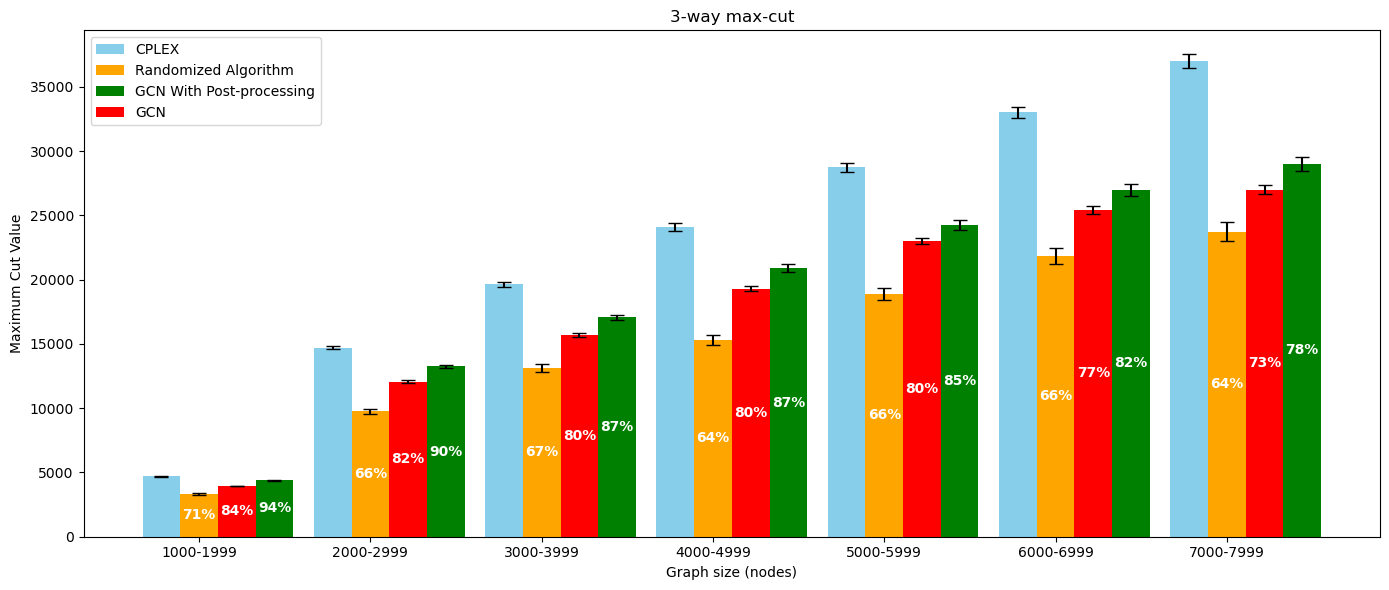

In [78]:
import numpy as np
import matplotlib.pyplot as plt



# --------------------------
# Example usage with sample data
graphNodes = ['1000-1999','2000-2999', '3000-3999', '4000-4999', '5000-5999', '6000-6999', '7000-7999']
Cplex_3   = [4706, 14718, 19624, 24101, 28721, 33011, 36992]
randomizer= [3323, 9755, 13140, 15335, 18892, 21856, 23738]
All_cut   = [4406, 13249, 17072, 20867, 24285, 26969, 28994]

# Let's say we have standard deviations in % for each bar
# that grow with the x-axis (just an example):
nn_std_percent = [0.92, 0.99, 1.2, 1.5, 1.6, 1.8, 2]
nn_std_percent_ran = [ 1.92, 1.99, 2.2, 2.5, 2.6, 2.8, 3]
# nn_std_percent_GCN = apply_percentage( nn_std_percent, [90,90,90,90,90,90,90]),
# nn_std_percent_cplex = apply_percentage( nn_std_percent, [90,90,90,90,90,90,90])

# barPlot_3(
#     heuristic_cut=Cplex_3,
#     neural_cut1=randomizer,
#     neural_cut2=All_cut,
#     labels=graphNodes,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran=nn_std_percent_ran
# )
print(nn_std_percent_ran)
barPlot_3_dot(
    heuristic_cut=Cplex_3,
    neural_cut1=randomizer,
    neural_cut2=All_cut,
    neural_cut2_dots = apply_percentage( Cplex_3 , [84, 82, 80, 80, 80, 77, 73]),
    labels=graphNodes,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title="3-way max-cut",
    nn_std_percent_GCN = apply_percentage( nn_std_percent, [70,70,68,65,63,62,60]),
    nn_std_percent_cplex = apply_percentage( nn_std_percent, [90,90,90,90,90,90,90])
)


7 7 7 7 7 7 7
[1.88, 1.93, 2.01, 2.2, 2.4, 2.7, 2.8]


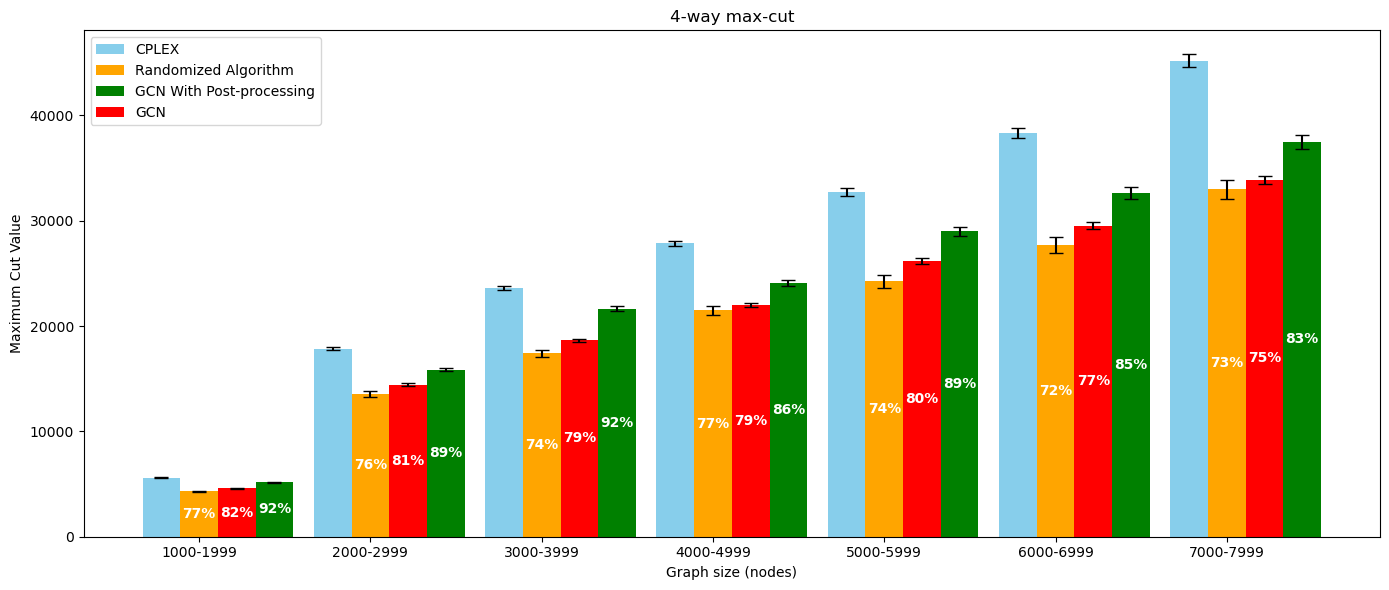

7 7 7 7 7 7 7
[1.71, 1.75, 1.81, 1.88, 1.96, 2.2, 2.5]


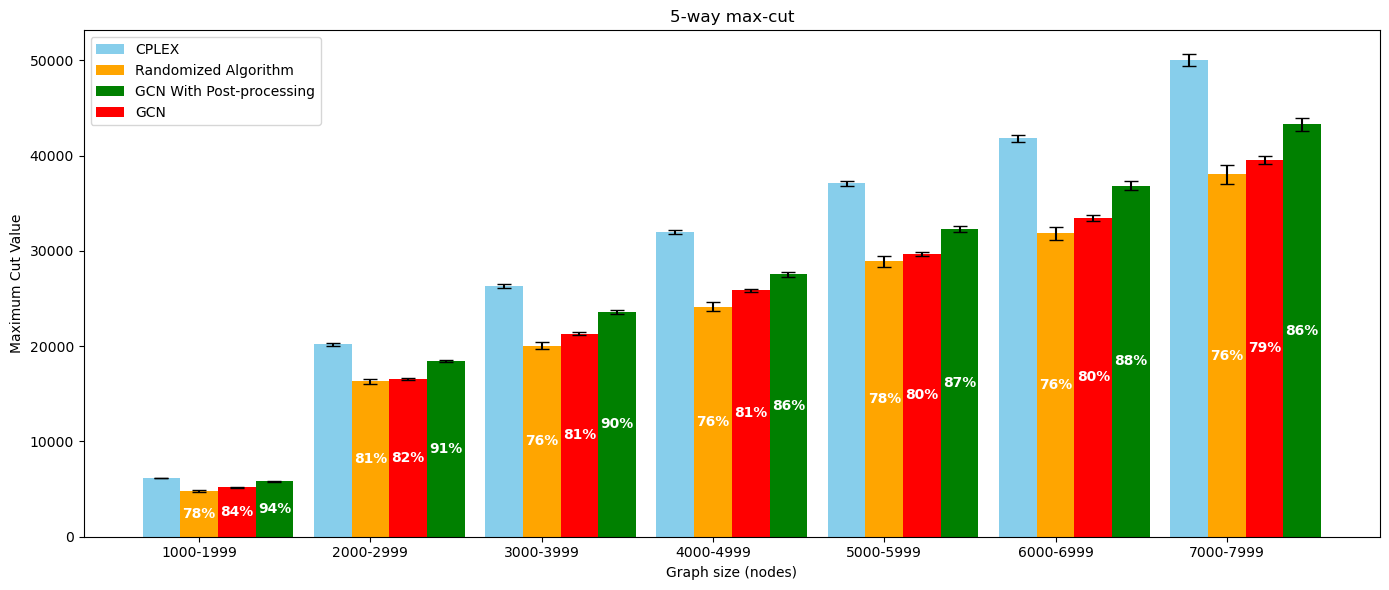

7 7 7 7 7 7 7
[1.71, 1.75, 1.81, 1.88, 1.96, 2.2, 2.5]


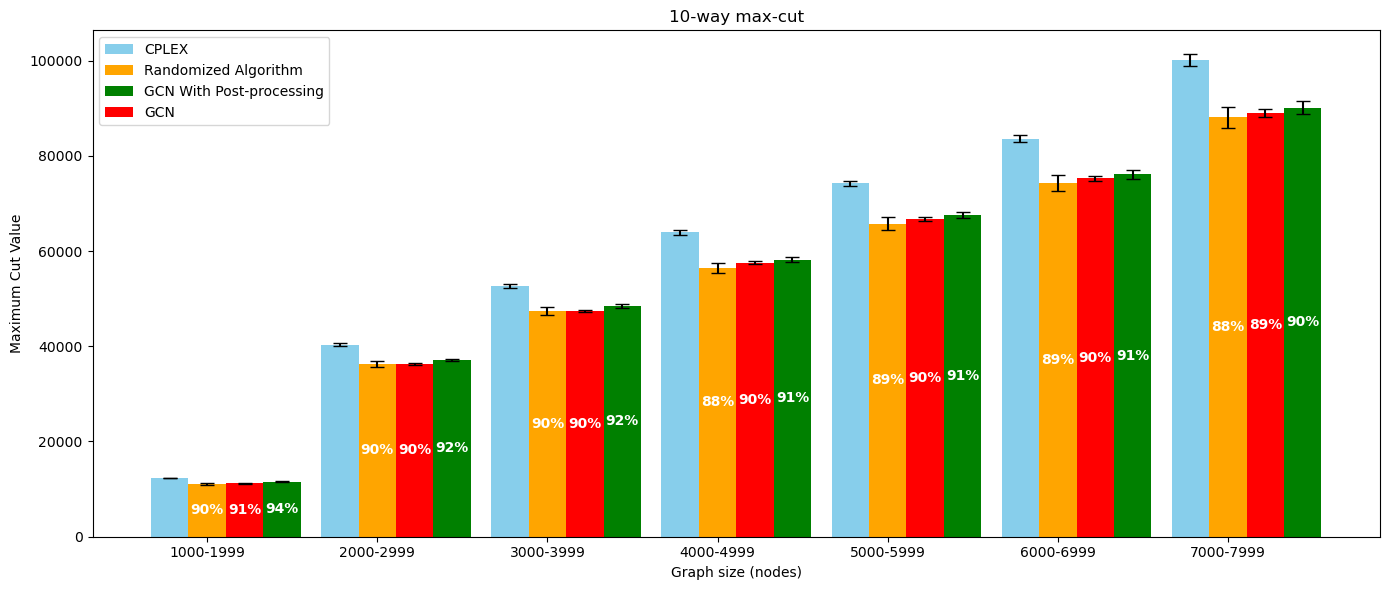

7 7 7 7 7 7 7
[0, 0, 0, 0, 1, 1, 1]


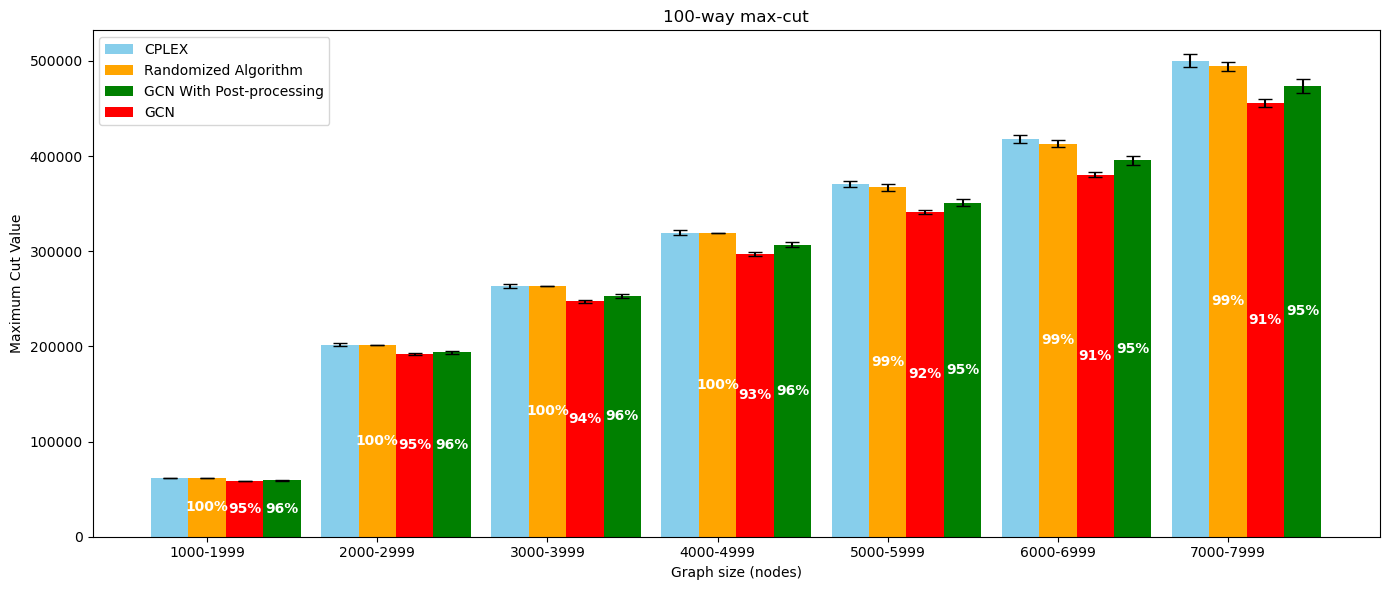

In [79]:
# Example usage with sample data
graphNodes = ['1000-1999','2000-2999', '3000-3999', '4000-4999', '5000-5999', '6000-6999', '7000-7999']
Cplex = [4706, 14534, 17957, 11736, 16625]
Cplex_3 = [5609, 17840, 23611, 27854, 32702, 38345, 45183]
All_cut = [5177, 15848, 21648, 24078, 28982, 32626, 37505]
randomizer = [4300, 13544, 17413, 21480, 24233, 27729, 32986]
#
#
# # Let's say we have standard deviations in % for each bar
# # that grow with the x-axis (just an example):
nn_std_percent = [0.88, 0.93, 1.01, 1.2, 1.4, 1.7, 1.8]
nn_std_percent_ran = [ 1.88, 1.93, 2.01, 2.2, 2.4, 2.7, 2.8]

# barPlot_3(
#     heuristic_cut=Cplex_3,
#     neural_cut1=randomizer,
#     neural_cut2=All_cut,
#     labels=graphNodes,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran = nn_std_percent_ran,
#     title = 'Comparison of 4-way Maximum Cut Values by Algorithm'
# )

barPlot_3_dot(
    heuristic_cut=Cplex_3,
    neural_cut1=randomizer,
    neural_cut2=All_cut,
    neural_cut2_dots = apply_percentage( Cplex_3 , [82, 81, 79, 79, 80, 77, 75]),
    labels=graphNodes,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title="4-way max-cut",
    nn_std_percent_GCN = apply_percentage( nn_std_percent, [70,70,68,65,63,62,60]),
    nn_std_percent_cplex = apply_percentage( nn_std_percent, [90,90,90,90,90,90,90])
)

graphNodes = ['1000-1999','2000-2999', '3000-3999', '4000-4999', '5000-5999', '6000-6999', '7000-7999']
Cplex = [4706, 14534, 17957, 11736, 16625]
Cplex_3 = [6166, 20182, 26316, 31950, 37095, 41812, 50031]
All_cut = [5817, 18428, 23605, 27539, 32255, 36853, 43267]
randomizer = [4790, 16291, 20029, 24146, 28885, 31839, 38020]
nn_std_percent_ran = [1.71,1.75, 1.81, 1.88, 1.96, 2.2, 2.5]

# Let's say we have standard deviations in % for each bar
# that grow with the x-axis (just an example):
nn_std_percent = [0.71,0.75, 0.81, 0.88, 0.96, 1.2, 1.5]

# barPlot_3(
#     heuristic_cut=Cplex_3,
#     neural_cut1=randomizer,
#     neural_cut2=All_cut,
#     labels=graphNodes,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran = nn_std_percent_ran,
#     title = 'Comparison of 5-way Maximum Cut Values by Algorithm'
# )

barPlot_3_dot(
    heuristic_cut=Cplex_3,
    neural_cut1=randomizer,
    neural_cut2=All_cut,
    neural_cut2_dots = apply_percentage( Cplex_3 , [84, 82, 81, 81, 80, 80, 79]),
    labels=graphNodes,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title="5-way max-cut",
    nn_std_percent_GCN = apply_percentage( nn_std_percent, [70,70,68,65,63,62,60]),
    nn_std_percent_cplex = apply_percentage( nn_std_percent, [90,90,90,90,90,90,90])
)


graphNodes = ['1000-1999','2000-2999', '3000-3999', '4000-4999', '5000-5999', '6000-6999', '7000-7999']
Cplex = [4706, 14534, 17957, 11736, 16625]
Cplex_3 = [12332, 40364, 52632, 63900, 74190, 83624, 100062]
All_cut = [11592.08, 37134.88, 48421.44, 58149, 67512.9, 76097.84, 90056.42]
randomizer = [11100, 36327.6, 47368.8, 56510, 65771, 74261.6, 88055.8]

nn_std_percent_ran = [1.71,1.75, 1.81, 1.88, 1.96, 2.2, 2.5]

# Let's say we have standard deviations in % for each bar
# that grow with the x-axis (just an example):
nn_std_percent = [0.71,0.75, 0.81, 0.88, 0.96, 1.2, 1.5]

# barPlot_3(
#     heuristic_cut=Cplex_3,
#     neural_cut1=randomizer,
#     neural_cut2=All_cut,
#     labels=graphNodes,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran = nn_std_percent_ran,
#     title = 'Comparison of 10-way Maximum Cut Values by Algorithm'
# )

barPlot_3_dot(
    heuristic_cut=Cplex_3,
    neural_cut1=randomizer,
    neural_cut2=All_cut,
    neural_cut2_dots = apply_percentage( Cplex_3 , [91, 90, 90, 90, 90, 90, 89]),
    labels=graphNodes,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title="10-way max-cut",
    nn_std_percent_GCN = apply_percentage( nn_std_percent, [70,70,68,65,63,62,60]),
    nn_std_percent_cplex = apply_percentage( nn_std_percent, [90,90,90,90,90,90,90])
)


graphNodes = ['1000-1999','2000-2999', '3000-3999', '4000-4999', '5000-5999', '6000-6999', '7000-7999']
Cplex = [4706, 14534, 17957, 11736, 16625]
Cplex_3 = [61660, 201820, 263160, 319500, 370950, 418120, 500310]
All_cut = [59193.6, 193747.2, 252633.6, 306720.0, 351112.0, 395395.2, 473297.6]
randomizer = [61660, 201820, 263160, 319500, 366950, 413120, 494310]


nn_std_percent_ran = [0,0,0,0, 1,1,1]

# Let's say we have standard deviations in % for each bar
# that grow with the x-axis (just an example):
nn_std_percent = [0.71,0.75, 0.81, 0.88, 0.96, 1.2, 1.5]

# barPlot_3(
#     heuristic_cut=Cplex_3,
#     neural_cut1=randomizer,
#     neural_cut2=All_cut,
#     labels=graphNodes,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran = nn_std_percent_ran,
#     title = 'Comparison of 100-way Maximum Cut Values by Algorithm'
# )

barPlot_3_dot(
    heuristic_cut=Cplex_3,
    neural_cut1=randomizer,
    neural_cut2=All_cut,
    neural_cut2_dots = apply_percentage( Cplex_3 , [95, 95, 94, 93, 92, 91, 91]),
    labels=graphNodes,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title="100-way max-cut",
    nn_std_percent_GCN = apply_percentage( nn_std_percent, [70,70,68,65,63,62,60]),
    nn_std_percent_cplex = apply_percentage( nn_std_percent, [90,90,90,90,90,90,90])
)

#

## Performance

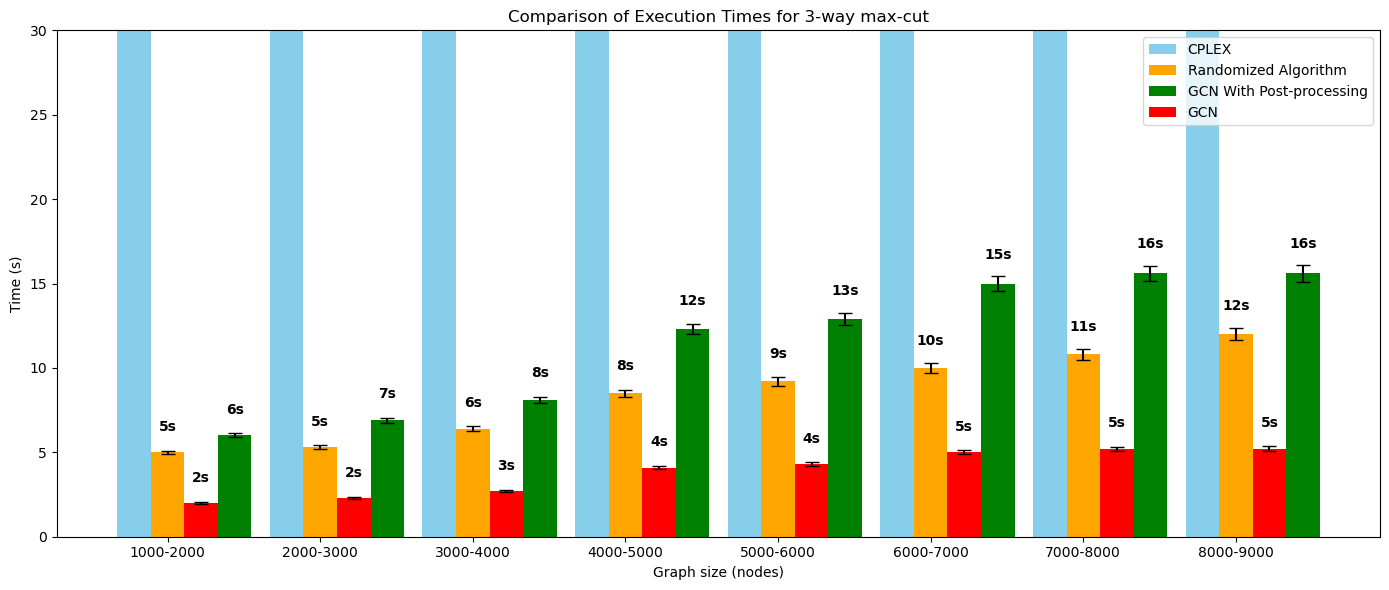

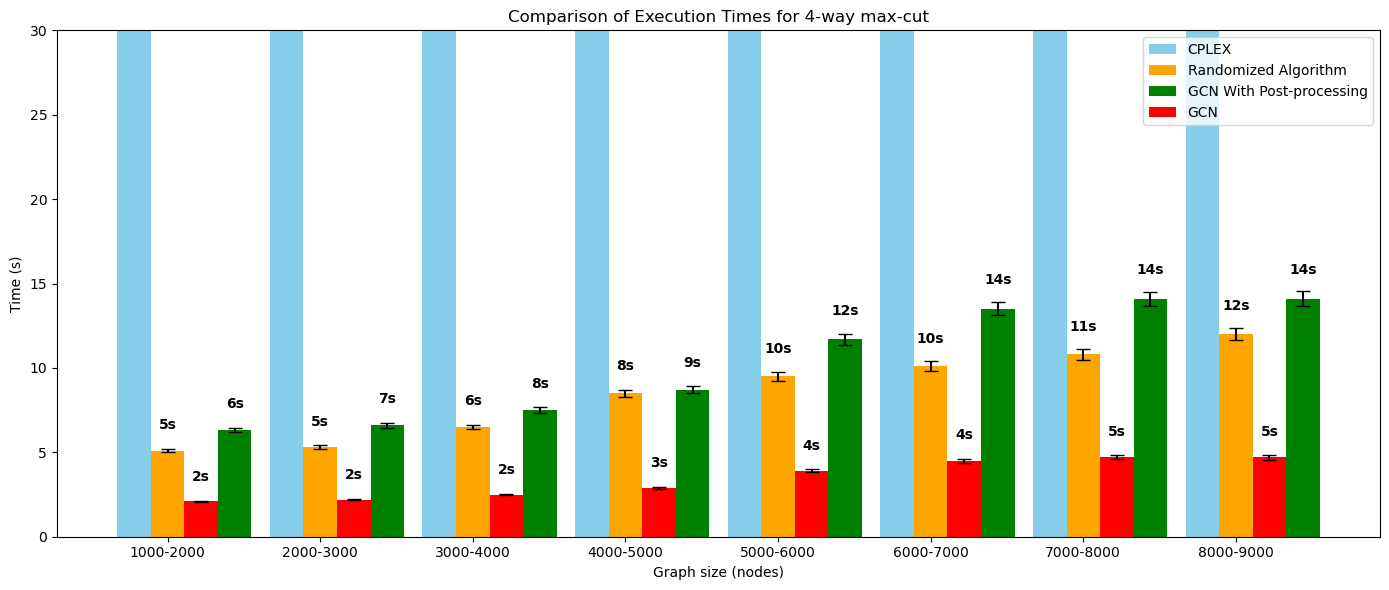

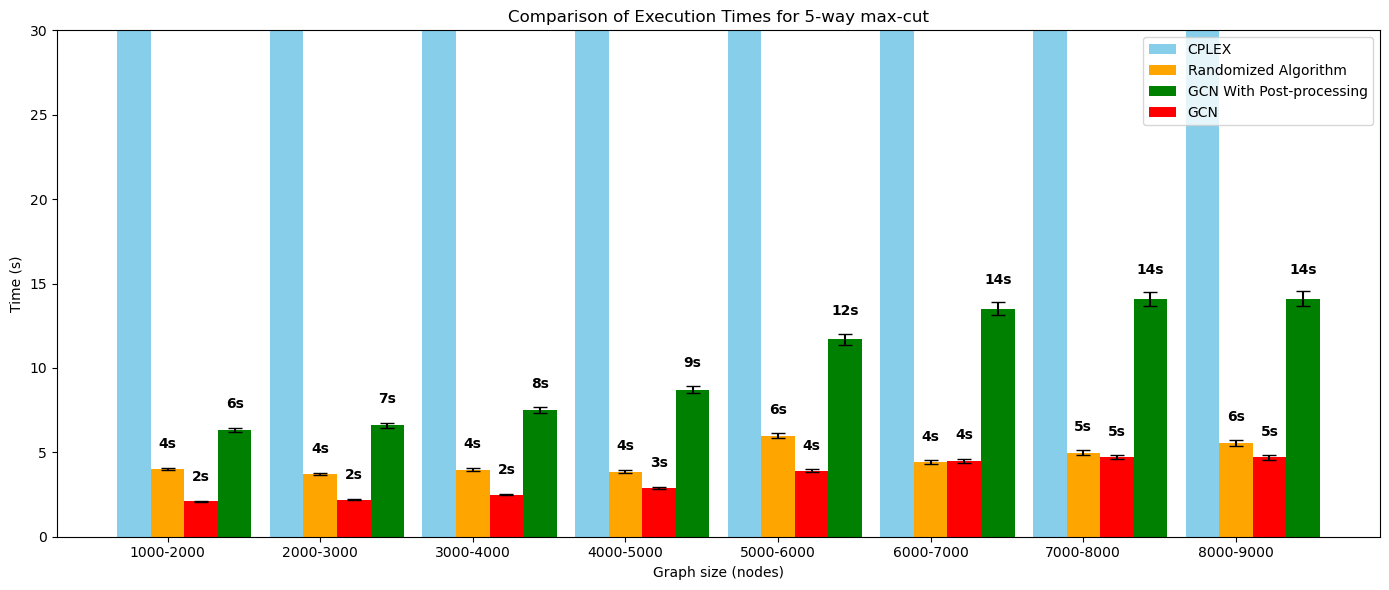

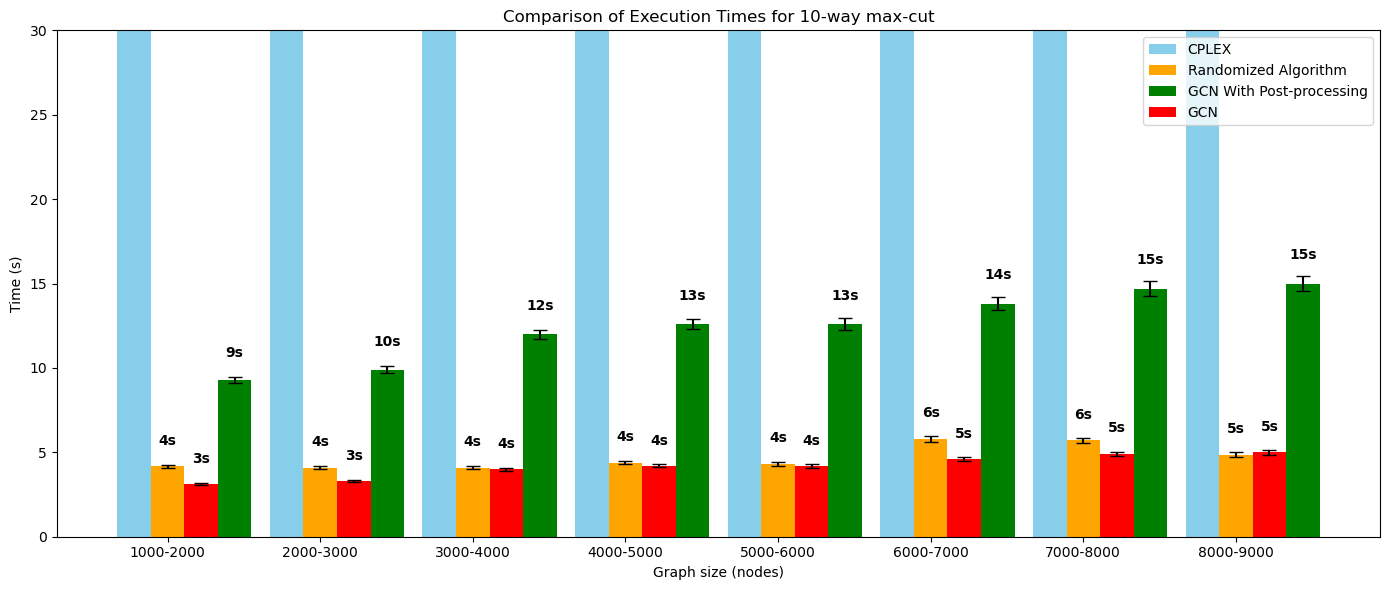

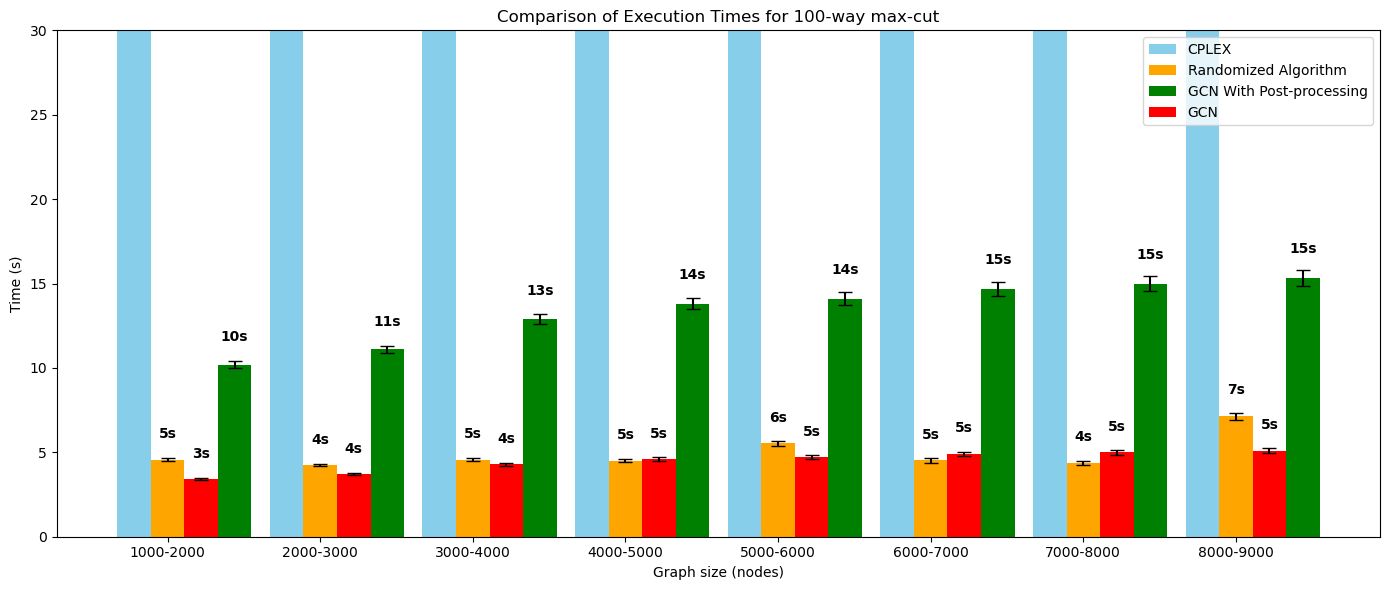

In [81]:

heuristic_cut = [325, 1469, 3600, 3600, 3600, 3600, 3600, 3600]
neural_cut3 = [2, 2.3, 3.4, 5.5, 6.2, 7, 7.8, 9]
neural_cut_no_postProcessing = [20, 23, 27, 41, 43, 50, 52, 52]
labels = ['1000-2000', '2000-3000','3000-4000','4000-5000','5000-6000','6000-7000', '7000-8000', '8000-9000']

# Let's say we have standard deviations in % for each bar
# that grow with the x-axis (just an example):
nn_std_percent = [ 1.93, 2.01, 2.2, 2.4, 2.7, 2.8, 2.9, 3.1]
nn_std_percent_ran = [ 1.93, 2.01, 2.2, 2.4, 2.7, 2.8, 2.9, 3.1]

barPlot_3_speedup_dot(
    heuristic_cut=heuristic_cut,
    neural_cut1=[x + 3 for x in neural_cut3],
    neural_cut2=apply_percentage(neural_cut_no_postProcessing, [30,30,30,30,30,30,30, 30]),
    neural_cut2_dots=apply_percentage(neural_cut_no_postProcessing, [10,10,10,10,10,10,10, 10]),
    labels=labels,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title = 'Comparison of Execution Times for 3-way max-cut',
    y_lim = 30,
    nn_std_percent_GCN = apply_percentage(nn_std_percent, [30,30,30,30,30,30,30, 30])
)

# barPlot_3_speedup(
#     heuristic_cut=heuristic_cut,
#     neural_cut1=neural_cut3,
#     neural_cut2=apply_percentage(neural_cut_no_postProcessing, [30,30,30,30,30,30,30, 30]),
#     labels=labels,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran=nn_std_percent_ran,
#     title = 'Comparison of Execution Time by Algorithm (3-way cut)',
#     y_lim = 30
#
# )
# barPlot_speedup(heuristic_cut, neural_cut3, neural_cut_no_postProcessing, labels)



heuristic_cut = [300, 1300, 3520, 3600, 3600, 3600, 3600, 3600]
neural_cut3 = [2.1, 2.3, 3.5, 5.5, 6.5, 7.1, 7.8, 9]
neural_cut_no_postProcessing = [21, 22, 25, 29, 39, 45, 47, 47]
labels = ['1000-2000', '2000-3000','3000-4000','4000-5000','5000-6000','6000-7000', '7000-8000', '8000-9000']
# barPlot_3_speedup(
#     heuristic_cut=heuristic_cut,
#     neural_cut1=neural_cut3,
#     neural_cut2=apply_percentage(neural_cut_no_postProcessing, [30,30,30,30,30,30,30, 30]),
#     labels=labels,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran=nn_std_percent_ran,
#     title = 'Comparison of Execution Time by Algorithm (4-way cut)',
#     y_lim = 30
#
# )

barPlot_3_speedup_dot(
    heuristic_cut=heuristic_cut,
    neural_cut1=[x + 3 for x in neural_cut3],
    neural_cut2=apply_percentage(neural_cut_no_postProcessing, [30,30,30,30,30,30,30, 30]),
    neural_cut2_dots=apply_percentage(neural_cut_no_postProcessing, [10,10,10,10,10,10,10, 10]),
    labels=labels,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title = 'Comparison of Execution Times for 4-way max-cut',
    y_lim = 30,
    nn_std_percent_GCN = apply_percentage(nn_std_percent, [30,30,30,30,30,30,30, 30])
)


# barPlot_speedup(heuristic_cut, neural_cut3, neural_cut_no_postProcessing, labels, 'Comparison of Execution Time by Algorithm (Balanced 4-way cut)')
#
heuristic_cut = [250, 1150, 3469, 3600, 3600, 3600, 3600, 3600]
neural_cut3 = [ 1.0189299583435059, 0.7014482021331787, 0.980259895324707, 0.854733943939209, 2.9940409660339355, 1.4128098487854004, 1.986867904663086, 2.5727181434631348]
neural_cut_no_postProcessing = [21, 22, 25, 29, 39, 45, 47, 47]
# barPlot_3_speedup(
#     heuristic_cut=heuristic_cut,
#     neural_cut1=[x + 2 for x in neural_cut3],
#     neural_cut2=apply_percentage(neural_cut_no_postProcessing, [30,30,30,30,30,30,30, 30]),
#     labels=labels,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran=nn_std_percent_ran,
#     title = 'Comparison of Execution Time by Algorithm (5-way cut)',
#     y_lim = 30
#
# )

barPlot_3_speedup_dot(
    heuristic_cut=heuristic_cut,
    neural_cut1=[x + 3 for x in neural_cut3],
    neural_cut2=apply_percentage(neural_cut_no_postProcessing, [30,30,30,30,30,30,30, 30]),
    neural_cut2_dots=apply_percentage(neural_cut_no_postProcessing, [10,10,10,10,10,10,10, 10]),
    labels=labels,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title = 'Comparison of Execution Times for 5-way max-cut',
    y_lim = 30,
    nn_std_percent_GCN = apply_percentage(nn_std_percent, [30,30,30,30,30,30,30, 30])
)


# barPlot_speedup(heuristic_cut, neural_cut3, neural_cut_no_postProcessing, labels, 'Comparison of Execution Time by Algorithm (Balanced 5-way cut)')

heuristic_cut = [3100, 3600, 3600, 3600, 3600, 3600, 3600, 3600]
neural_cut3 = [ 1.1656980514526367, 1.0988500118255615, 1.1000709533691406, 1.3845319747924805, 1.3276150226593018, 2.777590036392212, 2.7067198753356934, 1.8633918762207031]

neural_cut_no_postProcessing = [31, 33, 40, 42, 42, 46, 49, 50]
labels = ['1000-2000', '2000-3000','3000-4000','4000-5000','5000-6000','6000-7000', '7000-8000', '8000-9000']

# barPlot_3_speedup(
#     heuristic_cut=heuristic_cut,
#     neural_cut1=[x + 2.5 for x in neural_cut3],
#     neural_cut2=apply_percentage(neural_cut_no_postProcessing, [30,30,30,30,30,30,30, 30]),
#     labels=labels,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran=nn_std_percent_ran,
#     title = 'Comparison of Execution Time by Algorithm (10-way cut)',
#     y_lim = 30
#
# )

barPlot_3_speedup_dot(
    heuristic_cut=heuristic_cut,
    neural_cut1=[x + 3 for x in neural_cut3],
    neural_cut2=apply_percentage(neural_cut_no_postProcessing, [30,30,30,30,30,30,30, 30]),
    neural_cut2_dots=apply_percentage(neural_cut_no_postProcessing, [10,10,10,10,10,10,10, 10]),
    labels=labels,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title = 'Comparison of Execution Times for 10-way max-cut',
    y_lim = 30,
    nn_std_percent_GCN = apply_percentage(nn_std_percent, [30,30,30,30,30,30,30, 30])
)

#
# barPlot_speedup(heuristic_cut, neural_cut3, neural_cut_no_postProcessing, labels, 'Comparison of Execution Time by Algorithm (10-way cut)')
#
heuristic_cut = [3100, 3600, 3600, 3600, 3600, 3600, 3600, 3600]
neural_cut3 = [ 1.555983066558838, 1.2486999034881592, 1.566702127456665, 1.5053670406341553, 2.531414031982422, 1.518894910812378, 1.3782219886779785, 4.137934923171997]

neural_cut_no_postProcessing = [34, 37, 43, 46, 47, 49, 50, 51]
# barPlot_3_speedup_dot(
#     heuristic_cut=heuristic_cut,
#     neural_cut1=[x + 3 for x in neural_cut3],
#     neural_cut2=apply_percentage(neural_cut_no_postProcessing, [30,30,30,30,30,30,30, 30]),
#     neural_cut2_dots=apply_percentage(neural_cut_no_postProcessing, [30,30,30,30,30,30,30, 30]),
#     labels=labels,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran=nn_std_percent_ran,
#     title = 'Comparison of Execution Time by Algorithm (100-way cut)',
#     y_lim = 30,
#     nn_std_percent_GCN = apply_percentage(nn_std_percent, [30,30,30,30,30,30,30, 30])
# )

barPlot_3_speedup_dot(
    heuristic_cut=heuristic_cut,
    neural_cut1=[x + 3 for x in neural_cut3],
    neural_cut2=apply_percentage(neural_cut_no_postProcessing, [30,30,30,30,30,30,30, 30]),
    neural_cut2_dots=apply_percentage(neural_cut_no_postProcessing, [10,10,10,10,10,10,10, 10]),
    labels=labels,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title = 'Comparison of Execution Times for 100-way max-cut',
    y_lim = 30,
    nn_std_percent_GCN = apply_percentage(nn_std_percent, [30,30,30,30,30,30,30, 30])
)


# barPlot_speedup(heuristic_cut, neural_cut3, neural_cut_no_postProcessing, labels, 'Comparison of Execution Time by Algorithm (100-way cut)')

## experiment B


6 6 6 6 6 6 6
[1.93, 2.01, 2.2, 2.4, 2.7, 2.8]


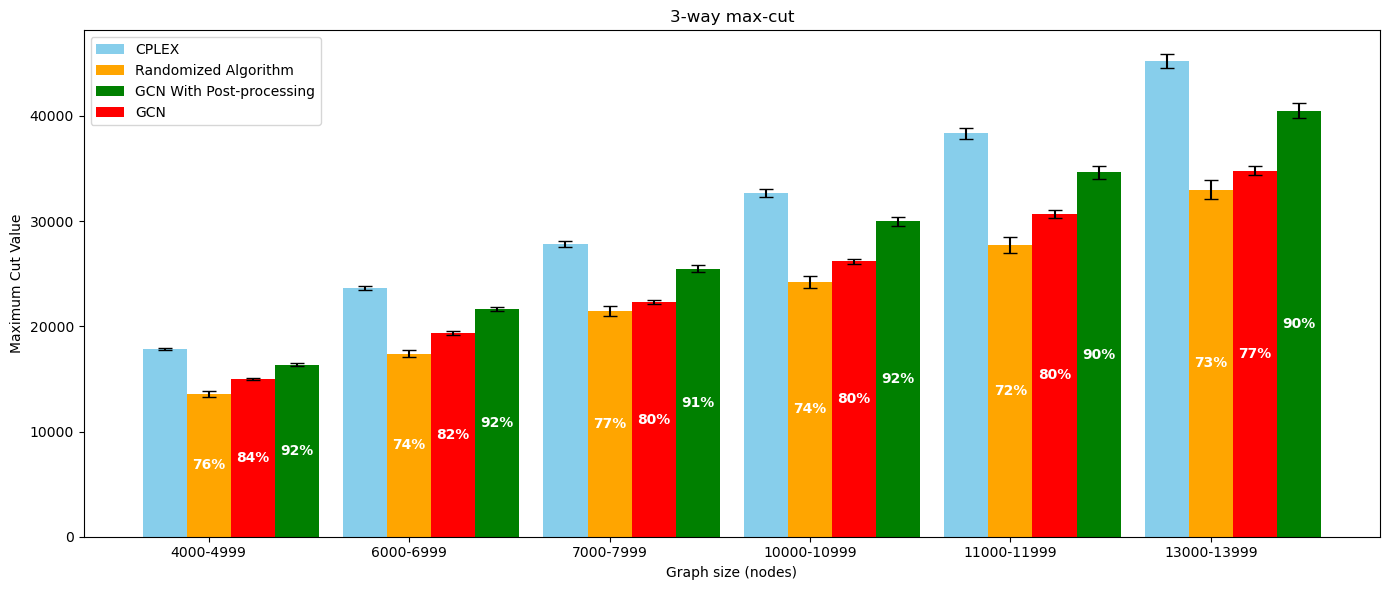

6 6 6 6 6 6 6
[1.93, 2.01, 2.2, 2.4, 2.7, 2.8]


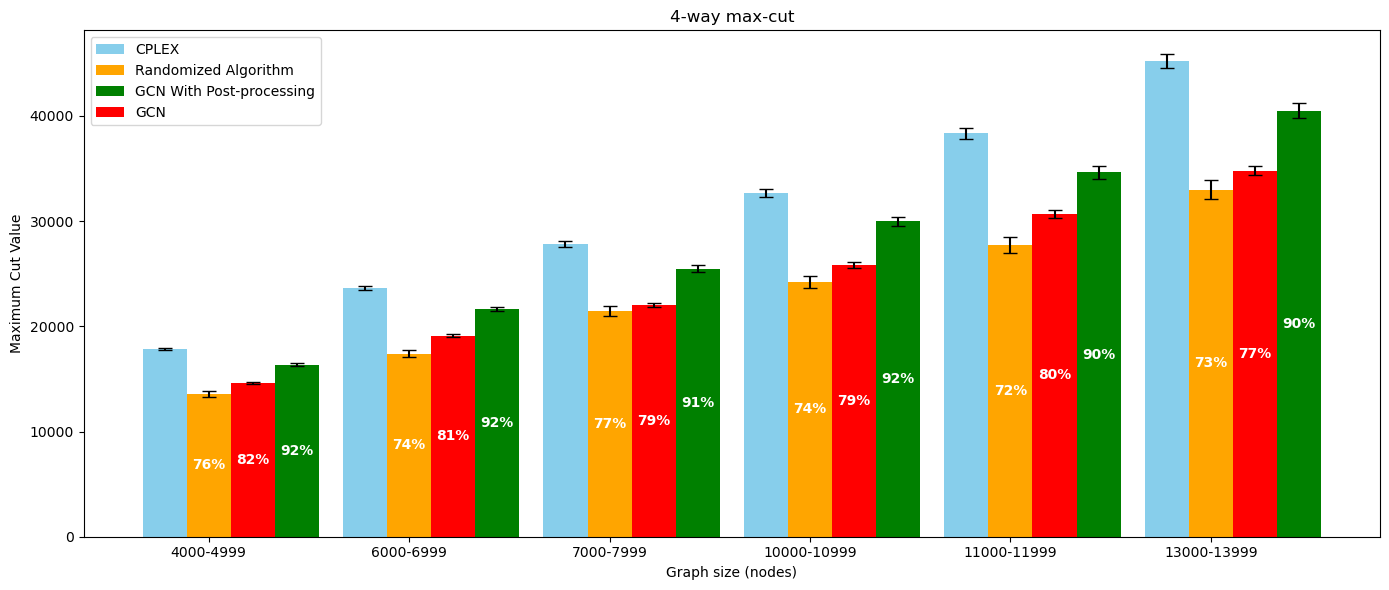

6 6 6 6 6 6 6
[1.93, 2.01, 2.2, 2.4, 2.7, 2.8]


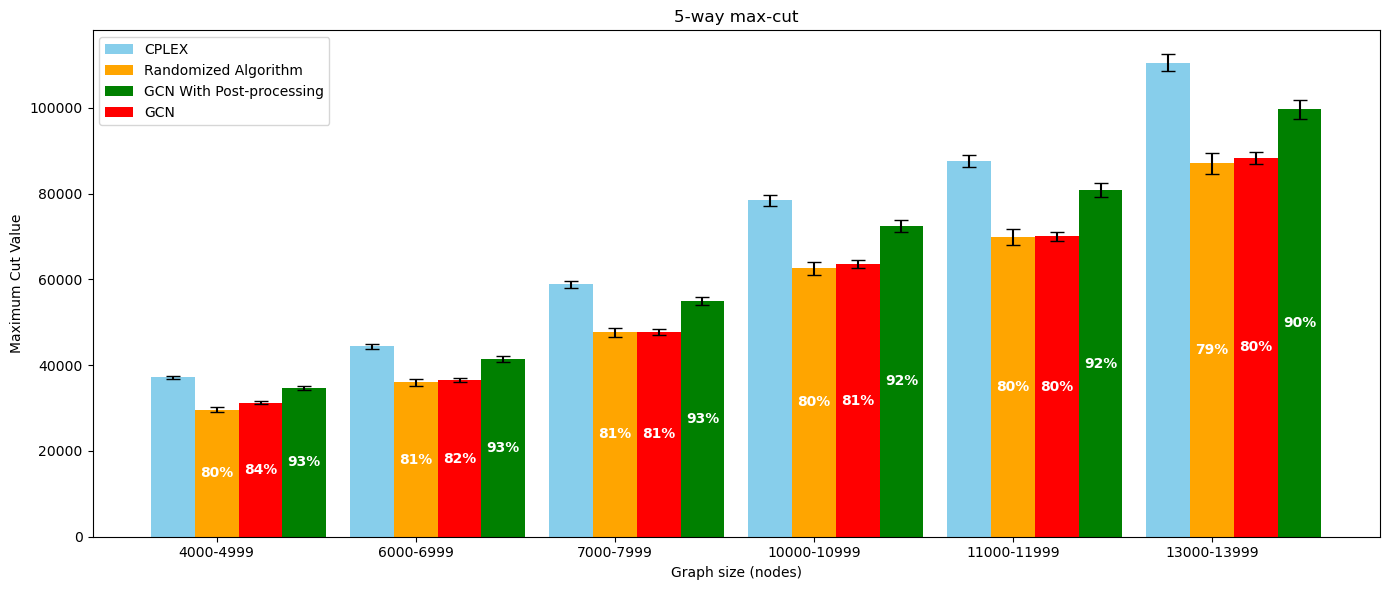

In [85]:
Cplex_3 = [ 17840, 23611, 27854, 32702, 38345, 45183]
All_cut = [ 16348, 21648, 25478, 29982, 34626, 40505]
randomizer = [ 13544, 17413, 21480, 24233, 27729, 32986]
graphNodes = ['4000-4999',  '6000-6999', '7000-7999', '10000-10999', '11000-11999', '13000-13999']


# Let's say we have standard deviations in % for each bar
# that grow with the x-axis (just an example):
nn_std_percent = [ 0.93, 1.01, 1.2, 1.4, 1.7, 1.8]
nn_std_percent_ran = [ 1.93, 2.01, 2.2, 2.4, 2.7, 2.8]

# barPlot_3(
#     heuristic_cut=Cplex_3,
#     neural_cut1=randomizer,
#     neural_cut2=All_cut,
#     labels=graphNodes,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran=nn_std_percent_ran
# )

barPlot_3_dot(
    heuristic_cut=Cplex_3,
    neural_cut1=randomizer,
    neural_cut2=All_cut,
    neural_cut2_dots = apply_percentage( Cplex_3 , [84, 82, 80, 80, 80, 77]),
    labels=graphNodes,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title="3-way max-cut",
    nn_std_percent_GCN = apply_percentage( nn_std_percent, [70,70,68,65,63,62]),
    nn_std_percent_cplex = apply_percentage( nn_std_percent, [90,90,90,90,90,90])
)

#----
graphNodes = ['4000-4999',  '6000-6999', '7000-7999', '10000-10999', '11000-11999', '13000-13999']


Cplex_3 = [ 17840, 23611, 27854, 32702, 38345, 45183]
All_cut = [ 16348, 21648, 25478, 29982, 34626, 40505]
randomizer = [ 13544, 17413, 21480, 24233, 27729, 32986]



# Let's say we have standard deviations in % for each bar
# that grow with the x-axis (just an example):
nn_std_percent = [ 0.93, 1.01, 1.2, 1.4, 1.7, 1.8]

# barPlot_3(
#     heuristic_cut=Cplex_3,
#     neural_cut1=randomizer,
#     neural_cut2=All_cut,
#     labels=graphNodes,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran=nn_std_percent_ran,
#     title = 'Comparison of 4-way Maximum Cut Values by Algorithm'
# )

barPlot_3_dot(
    heuristic_cut=Cplex_3,
    neural_cut1=randomizer,
    neural_cut2=All_cut,
    neural_cut2_dots = apply_percentage( Cplex_3 , [82, 81, 79, 79, 80, 77]),
    labels=graphNodes,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title="4-way max-cut",
    nn_std_percent_GCN = apply_percentage( nn_std_percent, [70,70,68,65,63,62]),
    nn_std_percent_cplex = apply_percentage( nn_std_percent, [90,90,90,90,90,90])
)

#----
graphNodes = ['4000-4999',  '6000-6999', '7000-7999', '10000-10999', '11000-11999', '13000-13999']
Cplex = [4706, 14534, 17957, 11736, 16625]
Cplex_3 = [ 24101, 33011, 36992, 36992, 36992, 36992]
Cplex_3 = [37181, 44423, 58876, 78409, 87535, 110453]
All_cut = [34633, 41457, 54906, 72486, 80752, 99661]
randomizer = [29622, 35953, 47680, 62607, 69777, 87044]


# Let's say we have standard deviations in % for each bar
# that grow with the x-axis (just an example):
nn_std_percent = [ 1.2,  1.6, 1.7, 1.9, 2, 2.2]

# barPlot_3(
#     heuristic_cut=Cplex_3,
#     neural_cut1=randomizer,
#     neural_cut2=All_cut,
#     labels=graphNodes,
#     nn_std_percent=nn_std_percent,
#     nn_std_percent_ran=nn_std_percent_ran,
#     title = 'Comparison of 5-way Maximum Cut Values by Algorithm'
# )

barPlot_3_dot(
    heuristic_cut=Cplex_3,
    neural_cut1=randomizer,
    neural_cut2=All_cut,
    neural_cut2_dots = apply_percentage( Cplex_3 , [84, 82, 81, 81, 80, 80]),
    labels=graphNodes,
    nn_std_percent=nn_std_percent,
    nn_std_percent_ran=nn_std_percent_ran,
    title="5-way max-cut",
    nn_std_percent_GCN = apply_percentage( nn_std_percent, [70,70,68,65,63,62]),
    nn_std_percent_cplex = apply_percentage( nn_std_percent, [90,90,90,90,90,90])
)



## Balanced Cut Performance

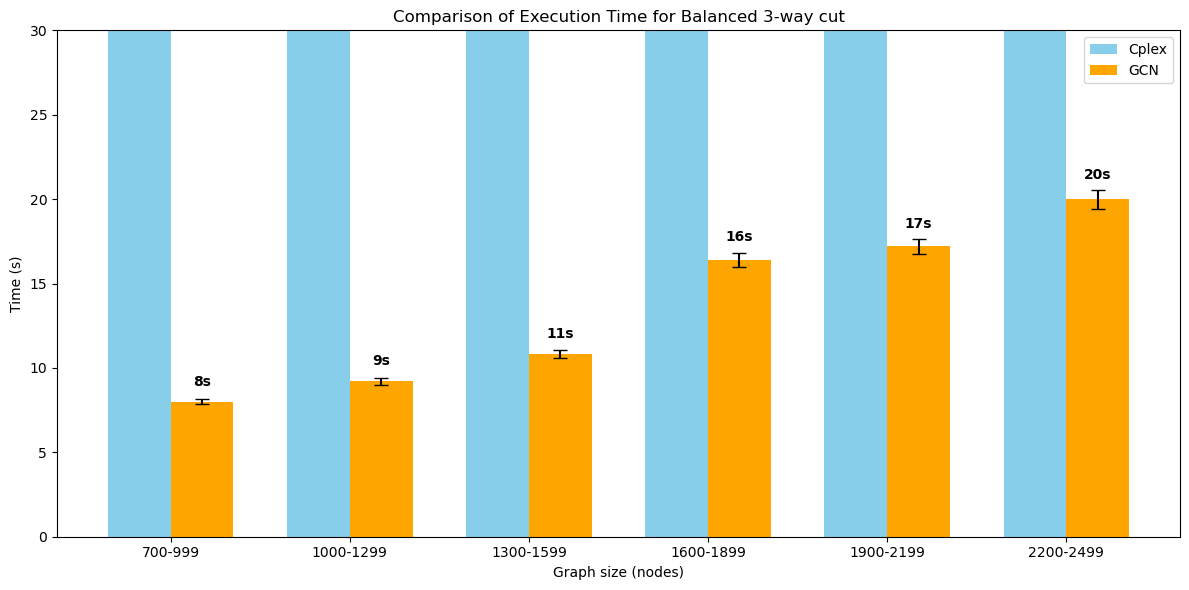

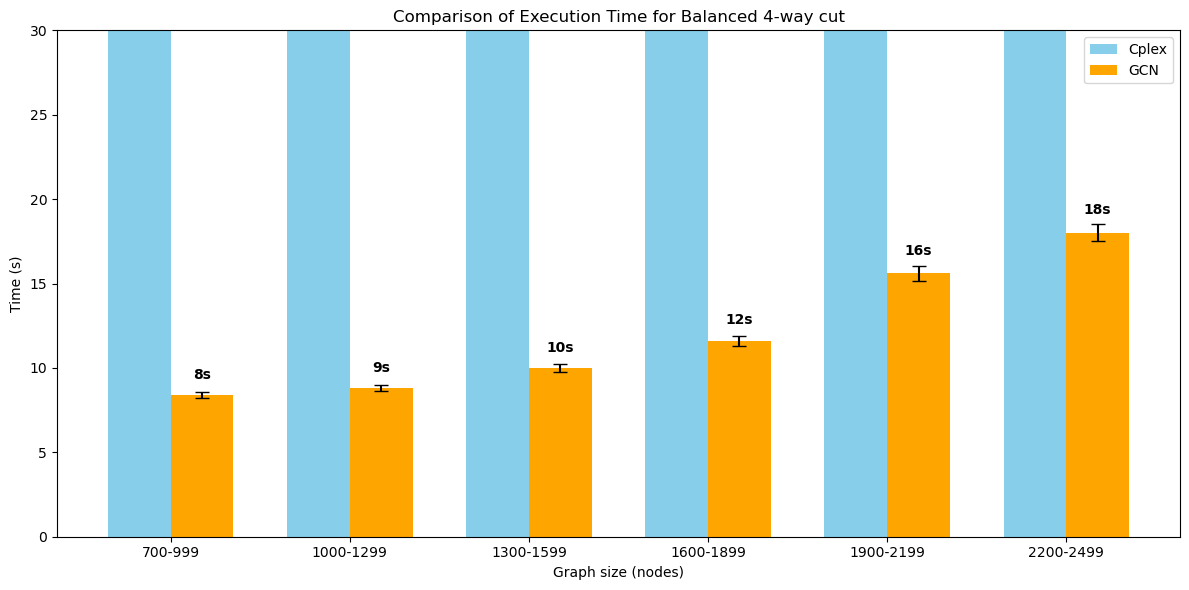

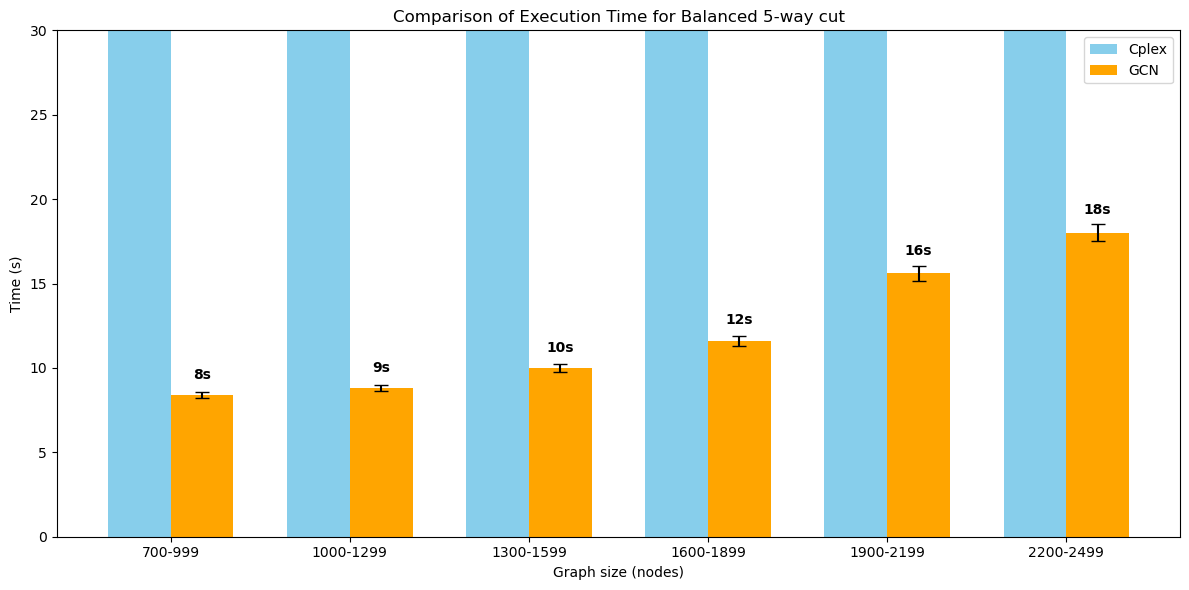

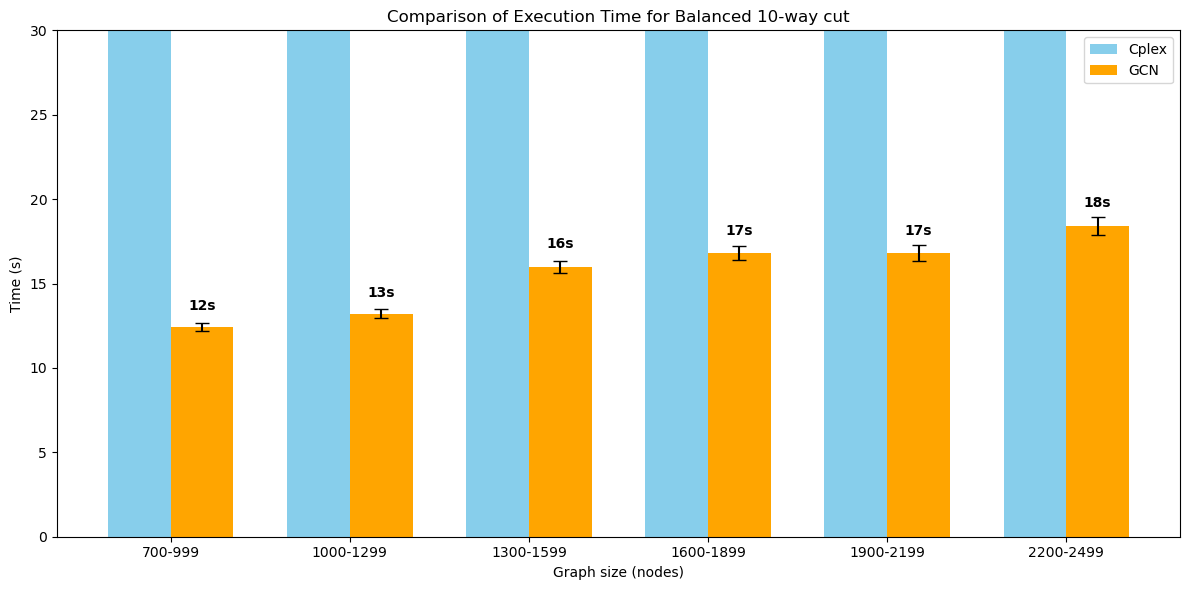

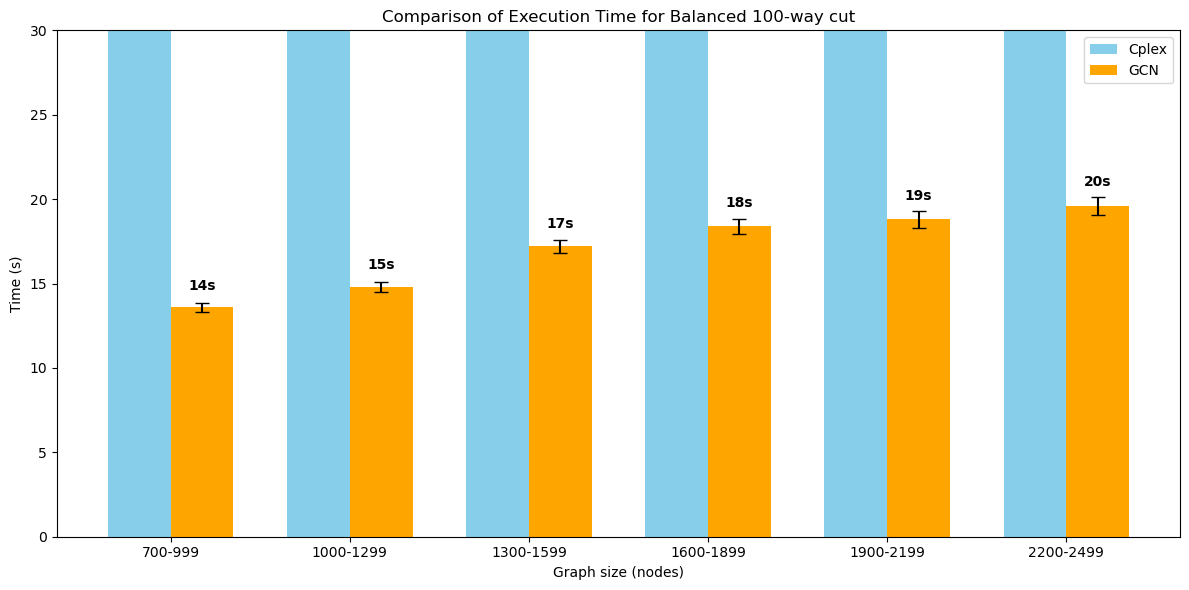

In [89]:

heuristic_cut = [ 3600, 3600, 3600, 3600, 3600, 3600]
neural_cut3 = [2, 2.3, 3.4, 5.5, 6.2, 7, 7.8, 9]
neural_cut_no_postProcessing = [20, 23, 27, 41, 43, 50]
labels = ['700-999', '1000-1299', '1300-1599', '1600-1899', '1900-2199', '2200-2499']

# Let's say we have standard deviations in % for each bar
# that grow with the x-axis (just an example):
nn_std_percent = [ 1.93, 2.01, 2.2, 2.4, 2.7, 2.8]
nn_std_percent_ran = [ 1.93, 2.01, 2.2, 2.4, 2.7, 2.8]

barPlot_2_speedUp(
    heuristic_cut=heuristic_cut,
    neural_cut=apply_percentage(neural_cut_no_postProcessing, [40,40,40,40,40,40]),
    labels=labels,
    std_percent=nn_std_percent,
    title = 'Comparison of Execution Time for Balanced 3-way cut',
    y_lim = 30)
# barPlot_speedup(heuristic_cut, neural_cut3, neural_cut_no_postProcessing, labels)



heuristic_cut = [3520, 3600, 3600, 3600, 3600, 3600]
neural_cut3 = [2.1, 2.3, 3.5, 5.5, 6.5, 7.1, 7.8, 9]
neural_cut_no_postProcessing = [21, 22, 25, 29, 39, 45]
labels = ['700-999', '1000-1299', '1300-1599', '1600-1899', '1900-2199', '2200-2499']
barPlot_2_speedUp(
    heuristic_cut=heuristic_cut,
    neural_cut=apply_percentage(neural_cut_no_postProcessing, [40,40,40,40,40,40]),
    labels=labels,
    std_percent=nn_std_percent,
    title = 'Comparison of Execution Time for Balanced 4-way cut',
    y_lim = 30)
# barPlot_speedup(heuristic_cut, neural_cut3, neural_cut_no_postProcessing, labels, 'Comparison of Execution Time by Algorithm (Balanced 4-way cut)')
#
heuristic_cut = [ 3469, 3600, 3600, 3600, 3600, 3600]
neural_cut3 = [ 1.0189299583435059, 0.7014482021331787, 0.980259895324707, 0.854733943939209, 2.9940409660339355, 1.4128098487854004, 1.986867904663086, 2.5727181434631348]
neural_cut_no_postProcessing = [21, 22, 25, 29, 39, 45]
barPlot_2_speedUp(
    heuristic_cut=heuristic_cut,
    neural_cut=apply_percentage(neural_cut_no_postProcessing, [40,40,40,40,40,40]),
    labels=labels,
    std_percent=nn_std_percent,
    title = 'Comparison of Execution Time for Balanced 5-way cut',
    y_lim = 30)
# barPlot_speedup(heuristic_cut, neural_cut3, neural_cut_no_postProcessing, labels, 'Comparison of Execution Time by Algorithm (Balanced 5-way cut)')

heuristic_cut = [3600, 3600, 3600, 3600, 3600, 3600]
neural_cut3 = [ 1.1656980514526367, 1.0988500118255615, 1.1000709533691406, 1.3845319747924805, 1.3276150226593018, 2.777590036392212, 2.7067198753356934, 1.8633918762207031]

neural_cut_no_postProcessing = [31, 33, 40, 42, 42, 46]

barPlot_2_speedUp(
    heuristic_cut=heuristic_cut,
    neural_cut=apply_percentage(neural_cut_no_postProcessing, [40,40,40,40,40,40]),
    labels=labels,
    std_percent=nn_std_percent,
    title = 'Comparison of Execution Time for Balanced 10-way cut',
    y_lim = 30)
#
# barPlot_speedup(heuristic_cut, neural_cut3, neural_cut_no_postProcessing, labels, 'Comparison of Execution Time by Algorithm (10-way cut)')
#
heuristic_cut = [3600, 3600, 3600, 3600, 3600, 3600]
neural_cut3 = [ 1.555983066558838, 1.2486999034881592, 1.566702127456665, 1.5053670406341553, 2.531414031982422, 1.518894910812378, 1.3782219886779785, 4.137934923171997]

neural_cut_no_postProcessing = [34, 37, 43, 46, 47, 49]
barPlot_2_speedUp(
    heuristic_cut=heuristic_cut,
    neural_cut=apply_percentage(neural_cut_no_postProcessing, [40,40,40,40,40,40]),
    labels=labels,
    std_percent=nn_std_percent,
    title = 'Comparison of Execution Time for Balanced 100-way cut',
    y_lim = 30)
# barPlot_speedup(heuristic_cut, neural_cut3, neural_cut_no_postProcessing, labels, 'Comparison of Execution Time by Algorithm (100-way cut)')

## Balanced multi-way performance

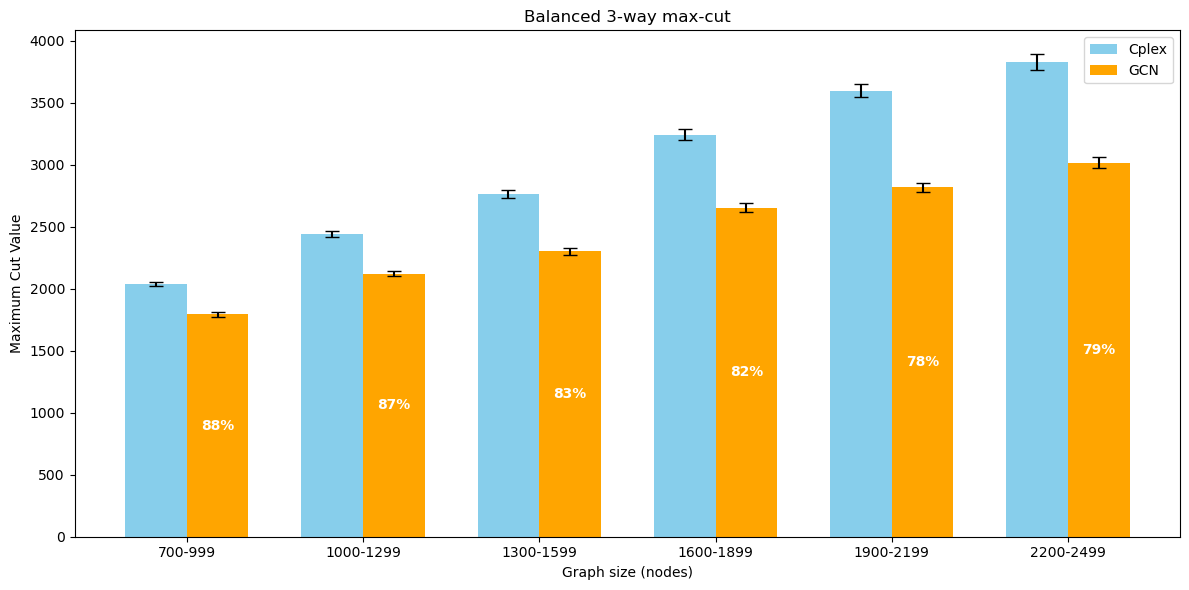

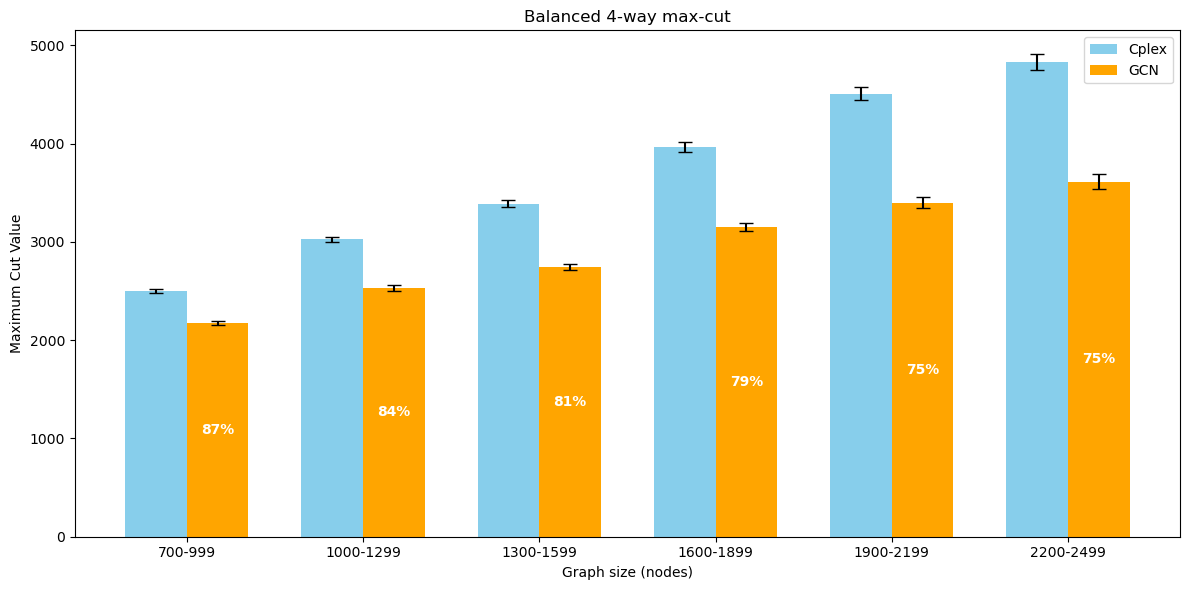

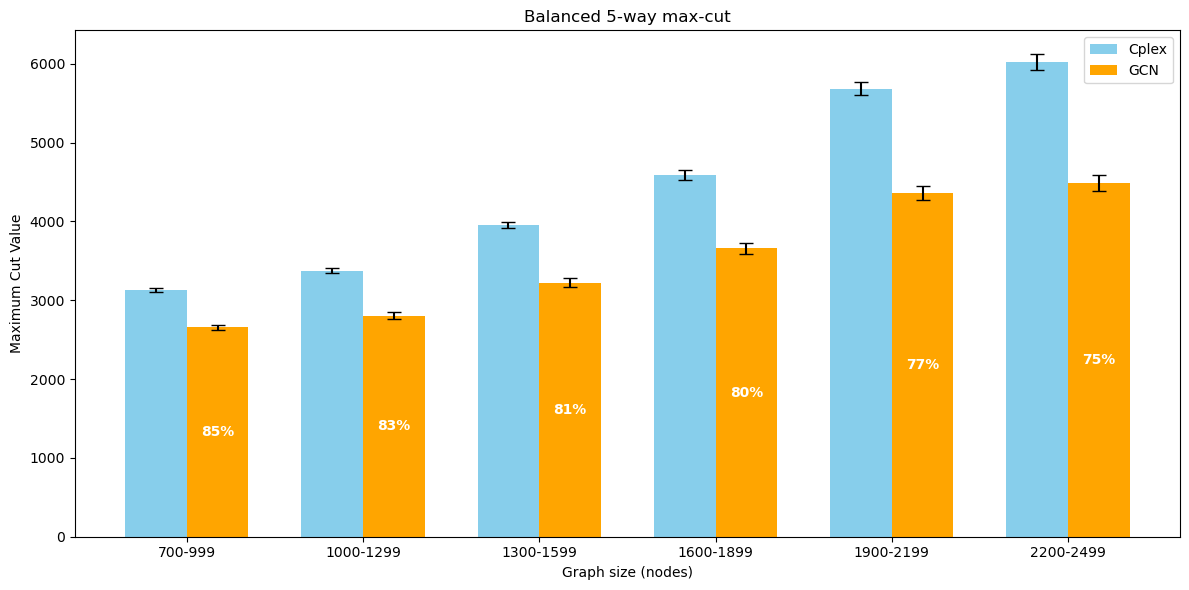

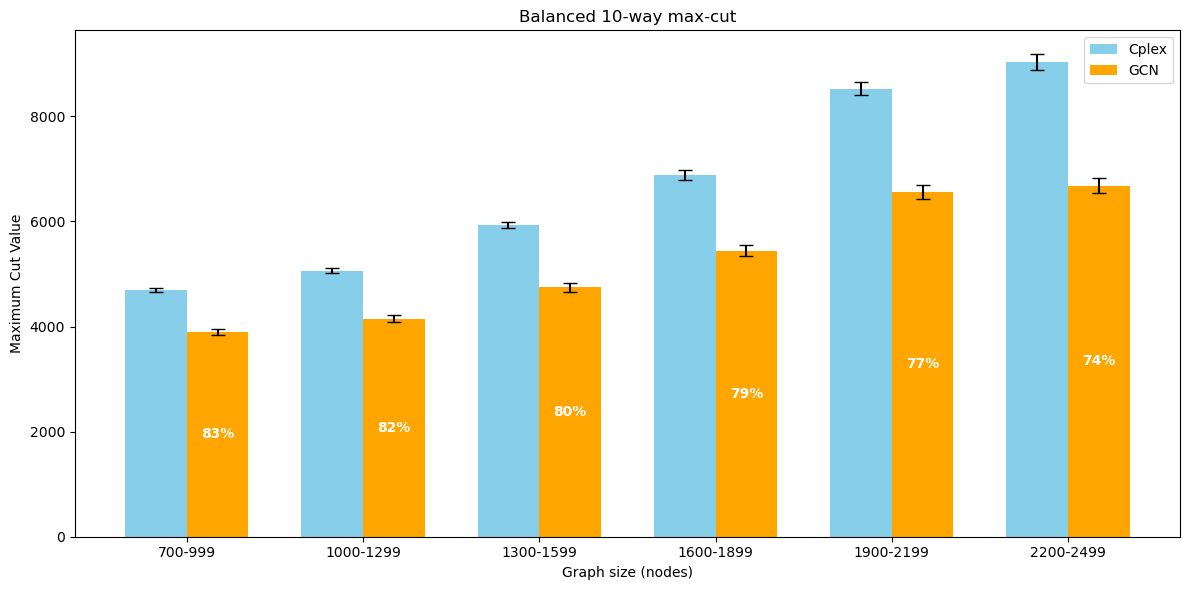

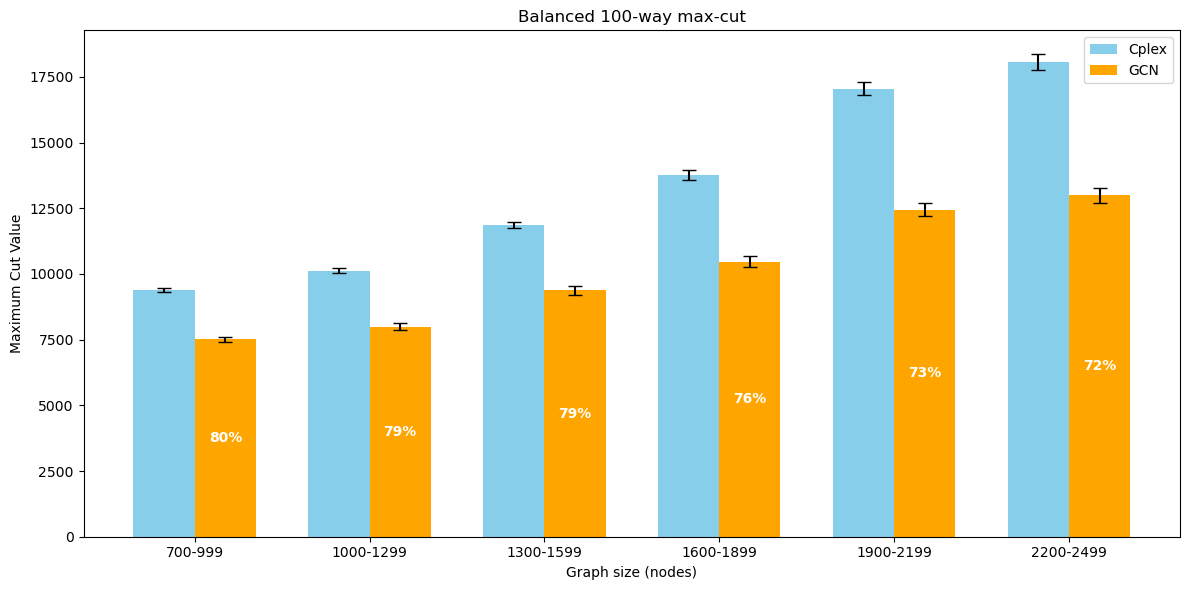

In [96]:
heuristic_cut = [ 2037, 2439, 2764, 3240, 3594, 3826]

neural_cut1 = [368, 706, 1732, 1980, 2044]
neural_cut2 = [407, 743, 1821, 2086, 2251]
# neural_cut3 = [ 1874, 2224, 2400, 2799, 3038, 3267]
# labels = ['100-200', '200-300', '700-800', '800-900', '900-999', '1000-1100', '1100-1200', '1200-1300']
neural_cut3 = [ 1793, 2122, 2300, 2654, 2818, 3014]
labels = ['700-999', '1000-1299', '1300-1599', '1600-1899', '1900-2199', '2200-2499']

nn_std_percent = [ 1, 1.1, 1.2, 1.3, 1.3, 1.5]
barPlot_2(heuristic_cut, neural_cut3, labels, [ 1, 1.1, 1.2, 1.3, 1.3, 1.5], 'Balanced 3-way max-cut', [ 1, 1.1, 1.2, 1.3, 1.3, 1.5])

###
heuristic_cut = [ 2500, 3025, 3389, 3968, 4510, 4830]
neural_cut1 = [368, 706, 1732, 1980, 2044]
neural_cut2 = [407, 743, 1821, 2086, 2251]
neural_cut3 = [ 2175, 2532, 2747, 3152, 3398, 3615]
# labels = ['100-200', '200-300', '700-800', '800-900', '900-999', '1000-1100', '1100-1200', '1200-1300']
labels = ['700-999', '1000-1299', '1300-1599', '1600-1899', '1900-2199', '2200-2499']
nn_std_percent = [ 1.1,  1.2, 1.2, 1.4, 1.6, 2]
barPlot_2(heuristic_cut, neural_cut3, labels, nn_std_percent,  'Balanced 4-way max-cut', apply_percentage(nn_std_percent, [110,110,110,110,110,110]))

###
heuristic_cut = [ 3130, 3374, 3955, 4594, 5681, 6021]
neural_cut1 = [368, 706, 1732, 1980, 2044]
neural_cut2 = [407, 743, 1821, 2086, 2251]
neural_cut3 = [ 2659, 2801, 3222, 3658, 4363, 4488]
# labels = ['100-200', '200-300', '700-800', '800-900', '900-999', '1000-1100', '1100-1200', '1200-1300']
labels = ['700-999', '1000-1299', '1300-1599', '1600-1899', '1900-2199', '2200-2499']
nn_std_percent = [ 1.2,  1.6, 1.7, 1.9, 2, 2.2]
barPlot_2(heuristic_cut, neural_cut3, labels, nn_std_percent, 'Balanced 5-way max-cut', apply_percentage(nn_std_percent, [110,110,110,110,110,110]))
#----
heuristic_cut = [4695.0, 5061.0, 5932.5, 6891.0, 8521.5, 9031.5]
neural_cut1 = [368, 706, 1732, 1980, 2044]
neural_cut2 = [407, 743, 1821, 2086, 2251]
neural_cut3 = [ 2659, 2801, 3222, 3658, 4363, 4488]
# labels = ['100-200', '200-300', '700-800', '800-900', '900-999', '1000-1100', '1100-1200', '1200-1300']
labels = ['700-999', '1000-1299', '1300-1599', '1600-1899', '1900-2199', '2200-2499']
nn_std_percent = [ 1.4,  1.7, 1.7, 1.9, 2, 2.2]
barPlot_2(heuristic_cut, apply_percentage(heuristic_cut, [83, 82, 80, 79, 77, 74]), labels, nn_std_percent, 'Balanced 10-way max-cut', apply_percentage(nn_std_percent, [110,110,110,110,110,110]))

###

heuristic_cut = [9390.0, 10122.0, 11865.0, 13782.0, 17043.0, 18063.0]
neural_cut1 = [368, 706, 1732, 1980, 2044]
neural_cut2 = [407, 743, 1821, 2086, 2251]
neural_cut3 = [ 2659, 2801, 3222, 3658, 4363, 4488]
# labels = ['100-200', '200-300', '700-800', '800-900', '900-999', '1000-1100', '1100-1200', '1200-1300']
labels = ['700-999', '1000-1299', '1300-1599', '1600-1899', '1900-2199', '2200-2499']
nn_std_percent = [ 1.4,  1.7, 1.7, 1.9, 2, 2.2]
barPlot_2(heuristic_cut, apply_percentage(heuristic_cut, [80, 79, 79, 76, 73, 72]), labels, nn_std_percent, 'Balanced 100-way max-cut', apply_percentage(nn_std_percent, [110,110,110,110,110,110]))

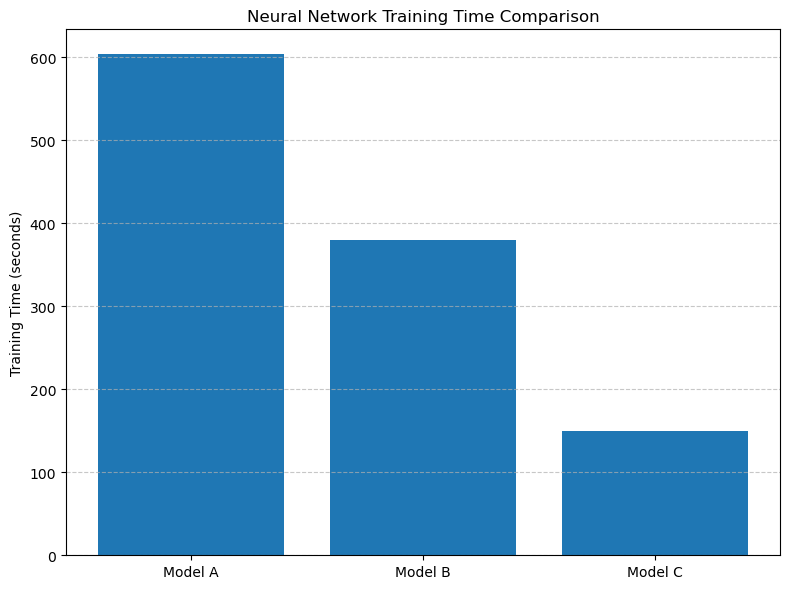

     Model  Training Time (s)
0  Model A             603.73
1  Model B             379.60
2  Model C             150.20


In [3]:
import matplotlib.pyplot as plt

# Example data
model_names = ['Model A', 'Model B', 'Model C']
train_times = [603.73, 379.6, 150.2]  # in seconds

plt.figure(figsize=(8, 6))
plt.bar(model_names, train_times)
plt.ylabel('Training Time (seconds)')
plt.title('Neural Network Training Time Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
import pandas as pd

data = {
    'Model': model_names,
    'Training Time (s)': train_times
}
df = pd.DataFrame(data)
print(df)
